In [1]:
import numpy as np
import pandas as pd
from math import lgamma
from ast import literal_eval, parse
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from scipy.integrate import simps
#%matplotlib inline

path = '/Users/chrislam/Desktop/sculpting/'
k = pd.Series([833, 134, 38, 15, 5, 0]) # "ground truth" Kepler transit multiplicity
nonzero_k = pd.Series([66355, 833, 134, 38, 15, 5, 0]) # "ground truth" Kepler transit multiplicity

In [2]:
#https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        #print(e)
        pass
    
def float_w_exceptions(x):
    try:
        return float(x)   
    except Exception as e:
        #print(e)
        pass

In [3]:
# change path here to get logLs_incremental_corrected.txt
df = pd.read_csv(path+'hipergator/logLs_incremental_corrected2.txt', sep='\t', error_bad_lines=False, skiprows=1, index_col=False,
                 names=['filename','m','b','c','f','logL','transit_multiplicity','intact_frac',
                            'disrupted_frac','intact_frac2','disrupted_frac2','intact_logL','intact_transit_multiplicity','disrupted_logL',
                        'disrupted_transit_multiplicity','young10_logL','young10_transit_multiplicity',
                        'old10_logL','old10_transit_multiplicity','young15_logL','young15_transit_multiplicity',
                        'old15_logL','old15_transit_multiplicity','young20_logL','young20_transit_multiplicity',
                        'old20_logL','old20_transit_multiplicity','young25_logL','young25_transit_multiplicity',
                        'old25_logL','old25_transit_multiplicity','young30_logL','young30_transit_multiplicity',
                        'old30_logL','old30_transit_multiplicity','young35_logL','young35_transit_multiplicity',
                        'old35_logL','old35_transit_multiplicity','young40_logL','young40_transit_multiplicity',
                        'old40_logL','old40_transit_multiplicity','young45_logL','young45_transit_multiplicity',
                        'old45_logL','old45_transit_multiplicity','young50_logL','young50_transit_multiplicity',
                        'old50_logL','old50_transit_multiplicity'], dtype=str)
print(df.head())
#print(df.columns)
print(df.transit_multiplicity[0])
#print(df.logL)

df.transit_multiplicity = df.transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
#df.transit_multiplicity = df.transit_multiplicity.apply(lambda y: np.nan if len(y)==0 else y)
#df.logL = df.logL.apply(str) # convert back from string to list of floats
df.logL = df.logL.apply(float_w_exceptions) # convert back from string to list of floats
df.m = df.m.apply(float_w_exceptions) # convert back from string to list of floats
df.b = df.b.apply(float_w_exceptions) # convert back from string to list of floats
df.c = df.c.apply(float_w_exceptions) # convert back from string to list of floats
df.f = df.f.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac = df.intact_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac = df.disrupted_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac2 = df.intact_frac2.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac2 = df.disrupted_frac2.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_logL = df.intact_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_transit_multiplicity = df.intact_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.disrupted_logL = df.disrupted_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_transit_multiplicity = df.disrupted_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young10_logL = df.young10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young10_transit_multiplicity = df.young10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old10_logL = df.old10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old10_transit_multiplicity = df.old10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young15_logL = df.young15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young15_transit_multiplicity = df.young15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old15_logL = df.old15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old15_transit_multiplicity = df.old15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young20_logL = df.young20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young20_transit_multiplicity = df.young20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old20_logL = df.old20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old20_transit_multiplicity = df.old20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young25_logL = df.young25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young25_transit_multiplicity = df.young25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old25_logL = df.old25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old25_transit_multiplicity = df.old25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young30_logL = df.young30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young30_transit_multiplicity = df.young30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old30_logL = df.old30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old30_transit_multiplicity = df.old30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young35_logL = df.young35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young35_transit_multiplicity = df.young35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old35_logL = df.old35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old35_transit_multiplicity = df.old35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young40_logL = df.young40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young40_transit_multiplicity = df.young40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old40_logL = df.old40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old40_transit_multiplicity = df.old40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young45_logL = df.young45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young45_transit_multiplicity = df.young45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old45_logL = df.old45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old45_transit_multiplicity = df.old45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young50_logL = df.young50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young50_transit_multiplicity = df.young50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old50_logL = df.old50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old50_transit_multiplicity = df.old50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats



                                            filename     m    b            c  \
0  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
1  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
2  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
3  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
4  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   

     f                logL            transit_multiplicity intact_frac  \
0  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
1  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
2  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
3  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
4  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   

  disrupted_frac intact_frac2  ...          old40_logL  \
0            0.0

In [4]:
import copy 

def add_zero_bin(curr_row: pd.Series):
    temp = copy.copy(curr_row.transit_multiplicity)
    temp.insert(0, 67380-np.sum(temp))
    
    return temp

df['transit_multiplicity_zero_bin'] = df.apply(func=add_zero_bin, axis=1)
print(df['transit_multiplicity_zero_bin'])

0                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                               ...                        
78315    [61179.0, 2277.9, 1598.4, 1112.4, 762.30000000...
78316    [61193.4, 2264.4, 1539.0, 1152.9, 797.4, 366.3...
78317    [60460.0, 2612.0, 1717.0, 1259.0, 816.0, 430.0...
78318    [60490.0, 2531.0, 1776.0, 1236.0, 847.0, 409.0...
78319    [60506.0, 2516.0, 1710.0, 1281.0, 886.0, 407.0...
Name: transit_multiplicity_zero_bin, Length: 78320, dtype: object


In [5]:
def normalize(curr_row: pd.Series, column):
    """
    First, remove fraction of planet-hosting systems from each multiplicity. 
    Then, normalize against sample total planet-hosting systems. 
    """
    #print(curr_row)
    first = curr_row[column]
    first += [0.] * (6 - len(first)) # pad with zeros to match length of k
    second = curr_row['f'] ### removed as of 13 June 2022 because the following step takes care of this
    #print(first)
    #print(second)
    
    try:
        # remove previous normalization
        first = [np.array(fl)/second for fl in first] ### removed as of 13 June 2022 because the following step takes care of this
        
        # normalize against Kepler data s.t. sum of every transit multiplicity is 1025
        if column=='transit_multiplicity_zero_bin': # zero bin case
            return [np.array(fl)*sum(k)/sum(first[1:]) for fl in first]
        
        elif column=='transit_multiplicity': # excluding zero bin            
            return [np.array(fl)*sum(k)/sum(first) for fl in first]
    
    except Exception as e: # return list of N nans, where N is length of transit multiplicity array    
        print(e)
        try: # eg. divide by zero for f=0; we don't care about those
            return np.nan*np.ones(len(first))
        
        except: # eg. accessed one too many levels
            return np.nan

def normalized_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of floats)
    - k: Kepler transit multiplicity; normally a global variable, but this is so it's flexible to including the zero-bin (list of floats)

    Returns: Poisson log likelihood (float)
    """
    logL = []
    try:
        for i in range(len(lam)):
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
    except:
        #print(lam)
        return np.nan
    
    return np.sum(logL)    

#normalized_k = k/sum(k)
df['normalized_transit_multiplicity'] = df.apply(func=normalize, args=['transit_multiplicity'], axis=1)
df['normalized_transit_multiplicity_zero_bin'] = df.apply(func=normalize, args=['transit_multiplicity_zero_bin'], axis=1)
#df['normalized_logL'] = better_loglike(df['normalized_transit_multiplicity'], normalized_k)
df['normalized_logL'] = df['normalized_transit_multiplicity'].apply(func=normalized_loglike, args=[k])
df['normalized_logL_zero_bin'] = df['normalized_transit_multiplicity_zero_bin'].apply(func=normalized_loglike, args=[nonzero_k])

df['likelihood'] = np.exp(df['logL'])
df['normalized_likelihood'] = np.exp(df['normalized_logL'])
df['normalized_likelihood_zero_bin'] = np.exp(df['normalized_logL_zero_bin'])


/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_17957/2909688228.py:15: RuntimeWarning: invalid value encountered in true_divide
  first = [np.array(fl)/second for fl in first] ### removed as of 13 June 2022 because the following step takes care of this
/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_17957/2909688228.py:15: RuntimeWarning: divide by zero encountered in true_divide
  first = [np.array(fl)/second for fl in first] ### removed as of 13 June 2022 because the following step takes care of this


In [6]:
df.loc[df.normalized_logL_zero_bin > -50]

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_frac2,...,old50_logL,old50_transit_multiplicity,transit_multiplicity_zero_bin,normalized_transit_multiplicity,normalized_transit_multiplicity_zero_bin,normalized_logL,normalized_logL_zero_bin,likelihood,normalized_likelihood,normalized_likelihood_zero_bin
2430,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-33.087143,"[782.2, 137.6, 51.800000000000004, 32.2, 15.8,...",0.095129,0.104871,0.198397,...,-230.323669,"[397.8, 63.0, 25.8, 15.200000000000001, 6.6000...","[66356.2, 782.2, 137.6, 51.800000000000004, 32...","[783.116819691346, 137.761281500293, 51.860714...","[66433.9763625708, 783.116819691346, 137.76128...",-33.086440,-39.603729,4.270082e-15,4.273085e-15,6.314209e-18
2438,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-36.607052,"[771.6, 138.8, 47.0, 37.6, 18.0, 3.40000000000...",0.094799,0.105201,0.197358,...,-242.277625,"[380.40000000000003, 72.8, 21.400000000000002,...","[66363.6, 771.6, 138.8, 47.0, 37.6, 18.0, 3.40...","[778.1286894923259, 139.97441951987406, 47.397...","[66925.11806375443, 778.1286894923259, 139.974...",-36.570770,-45.476368,1.264036e-16,1.310739e-16,1.777724e-20
7376,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.6,1.584893e+08,0.2,-36.620767,"[772.6, 143.6, 51.6, 36.2, 17.2, 3.6]",0.095318,0.104682,0.198917,...,-246.875736,"[379.40000000000003, 67.4, 23.6, 18.4000000000...","[66355.2, 772.6, 143.6, 51.6, 36.2, 17.2, 3.6]","[772.750780640125, 143.62802498048399, 51.6100...","[66368.14988290396, 772.750780640125, 143.6280...",-36.620748,-43.092378,1.246817e-16,1.246842e-16,1.928494e-19
7377,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.6,1.584893e+08,0.2,-37.510578,"[770.4000000000001, 129.20000000000002, 53.2, ...",0.095029,0.104971,0.197907,...,-252.465514,"[377.20000000000005, 64.2, 24.6, 17.4000000000...","[66368.4, 770.4000000000001, 129.2000000000000...","[780.6049822064058, 130.91142744167655, 53.904...","[67247.53855278765, 780.6049822064058, 130.911...",-37.422217,-49.842004,5.121096e-17,5.594196e-17,2.258879e-22
25011,/blue/sarahballard/c.lam/sculpting2/simulation...,-1.4,0.2,1.000000e+08,0.2,-35.631326,"[774.6, 130.0, 53.800000000000004, 36.2, 15.20...",0.096225,0.103775,0.202286,...,-244.198532,"[387.20000000000005, 61.6, 23.8, 17.2, 6.4, 1.8]","[66366.4, 774.6, 130.0, 53.800000000000004, 36...","[783.311957379637, 131.46211523283347, 54.4050...","[67112.82557221783, 783.311957379637, 131.4621...",-35.567456,-46.332592,3.353605e-16,3.574785e-16,7.551111e-21
35273,/blue/sarahballard/c.lam/sculpting2/simulation...,-1.0,0.8,3.981072e+08,0.2,-41.454200,"[764.2, 139.20000000000002, 56.2, 38.2, 18.6, ...",0.096009,0.103991,0.201024,...,-249.512965,"[377.40000000000003, 65.2, 29.6, 15.4, 6.4, 2.2]","[66359.2, 764.2, 139.20000000000002, 56.2, 38....","[767.3442398119122, 139.77272727272728, 56.431...","[66632.22962382445, 767.3442398119122, 139.772...",-41.445572,-48.493420,9.923607e-19,1.000960e-18,8.701121e-22
42928,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.6,0.7,6.309573e+08,0.2,-42.019180,"[765.6, 141.6, 51.800000000000004, 38.40000000...",0.101918,0.098082,0.221134,...,-255.610432,"[373.0, 65.8, 27.8, 18.2, 9.4, 1.6]","[66357.0, 765.6, 141.6, 51.800000000000004, 38...","[767.0967741935484, 141.87683284457475, 51.901...","[66486.7302052786, 767.0967741935484, 141.8768...",-42.017226,-48.618138,5.640299e-19,5.651330e-19,7.680882e-22
43325,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.6,0.8,1.000000e+09,0.2,-31.945092,"[771.2, 136.0, 52.400000000000006, 35.80000000...",0.095174,0.104826,0.198679,...,-239.580117,"[383.8, 67.8, 27.0, 19.6, 4.800000000000001, 1...","[66370.4, 771.2, 136.0, 52.400000000000006, 35...","[782.9635499207607, 138.0744849445325, 53.1992...","[67382.78526148968, 782.9635499207607, 138.074...",-31.828232,-46.177090,1.337897e-14,1.503746e-14,8.821547e-21
46684,/blue/sarahballard/c.lam/sculpting2/sim

In [10]:
df.transit_multiplicity

0                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                               ...                        
78315    [2277.9, 1598.4, 1112.4, 762.3000000000001, 36...
78316    [2264.4, 1539.0, 1152.9, 797.4, 366.3, 66.6000...
78317         [2612.0, 1717.0, 1259.0, 816.0, 430.0, 86.0]
78318         [2531.0, 1776.0, 1236.0, 847.0, 409.0, 91.0]
78319         [2516.0, 1710.0, 1281.0, 886.0, 407.0, 74.0]
Name: transit_multiplicity, Length: 78320, dtype: object

In [11]:
df.transit_multiplicity_zero_bin

0                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                               ...                        
78315    [61179.0, 2277.9, 1598.4, 1112.4, 762.30000000...
78316    [61193.4, 2264.4, 1539.0, 1152.9, 797.4, 366.3...
78317    [60460.0, 2612.0, 1717.0, 1259.0, 816.0, 430.0...
78318    [60490.0, 2531.0, 1776.0, 1236.0, 847.0, 409.0...
78319    [60506.0, 2516.0, 1710.0, 1281.0, 886.0, 407.0...
Name: transit_multiplicity_zero_bin, Length: 78320, dtype: object

In [12]:
df.normalized_transit_multiplicity

0                           [nan, nan, nan, nan, nan, nan]
1                           [nan, nan, nan, nan, nan, nan]
2                           [nan, nan, nan, nan, nan, nan]
3                           [nan, nan, nan, nan, nan, nan]
4                           [nan, nan, nan, nan, nan, nan]
                               ...                        
78315    [376.5275761973875, 264.20899854862114, 183.87...
78316    [375.16729706139074, 254.9825429153331, 191.01...
78317    [386.89306358381504, 254.32442196531792, 186.4...
78318    [376.52757619738753, 264.2089985486212, 183.87...
78319    [375.16729706139074, 254.98254291533314, 191.0...
Name: normalized_transit_multiplicity, Length: 78320, dtype: object

In [13]:
df.normalized_transit_multiplicity_zero_bin

0                      [inf, nan, nan, nan, nan, nan, nan]
1                      [inf, nan, nan, nan, nan, nan, nan]
2                      [inf, nan, nan, nan, nan, nan, nan]
3                      [inf, nan, nan, nan, nan, nan, nan]
4                      [inf, nan, nan, nan, nan, nan, nan]
                               ...                        
78315    [10112.639090469278, 376.5275761973875, 264.20...
78316    [10138.563184948112, 375.16729706139074, 254.9...
78317    [8955.41907514451, 386.89306358381504, 254.324...
78318    [8998.87518142235, 376.52757619738753, 264.208...
78319    [9022.206866453302, 375.16729706139074, 254.98...
Name: normalized_transit_multiplicity_zero_bin, Length: 78320, dtype: object

In [14]:
df.normalized_logL

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
78315   -480.541302
78316   -486.174721
78317   -462.889185
78318   -480.541302
78319   -486.174721
Name: normalized_logL, Length: 78320, dtype: float64

In [15]:
df.normalized_logL_zero_bin

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
78315   -69073.871696
78316   -68935.543569
78317   -75962.937204
78318   -75702.836972
78319   -75559.983889
Name: normalized_logL_zero_bin, Length: 78320, dtype: float64

In [7]:
def better_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of ints)
    - k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

    Returns: Poisson log likelihood (float)
    """
    
    logL = []
    #print(lam)
    for i in range(len(lam)):
        try:
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
        except Exception as e:
            #print("error here: ", lam)
            #print("error: ", e)
            return lam

    return np.sum(logL)

def pad(lam):
    lam += [0.] * (6 - len(lam)) # pad with zeros to match length of k
    return lam

def fix_c_for_flat_models(m, c): # basically removes grids in 4d param space, which causes problems later when marginalizing
    if m==0:
        return 1e8
    else:
        return c

def redundancy_check(m, b, cutoff):
    # skip simulations if cutoff occurs more than once after probability has reached zero (use the first one for all)
    # also don't vary cutoffs if m is flat   

    y = b + m*(np.log10(cutoff)-8)
    if y < 0:
        return False
    #elif m==0:
    #    return False
    else:
        return True
    
# c's that span cutoff time parameter space don't make sense for m=0. Set those all to minimum cutoff time.
df['fixed_c'] = df.apply(lambda x: fix_c_for_flat_models(x.m, x.c), axis=1) 
df['redundant'] = df.apply(lambda x: redundancy_check(x.m, x.b, x.fixed_c), axis=1)

### in order to marginalize over posteriors, I need to add. In order to add, I need to unlog
df['normalized_likelihood'] = np.exp(df['normalized_logL'])

# re-evaluate logL based on new k
#df['padded_transit_multiplicities'] = df.transit_multiplicity.apply(pad)

#df['corrected_logL'] = df.padded_transit_multiplicities.apply(lambda x: better_loglike(x, pad(list(k))))


In [124]:
df[['normalized_likelihood', 'normalized_logL']]

,normalized_likelihood,normalized_logL
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
78315,2.011704e-209,-480.541302
78316,7.194512e-212,-486.174721
78317,9.327843e-202,-462.889185
78318,2.011704e-209,-480.541302


In [80]:
df.loc[(df.normalized_logL_zero_bin >= -100)] 

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_frac2,...,transit_multiplicity_zero_bin,normalized_transit_multiplicity,normalized_transit_multiplicity_zero_bin,normalized_logL,normalized_logL_zero_bin,likelihood,normalized_likelihood,normalized_likelihood_zero_bin,fixed_c,redundant
2430,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-33.087143,"[782.2, 137.6, 51.800000000000004, 32.2, 15.8,...",0.095129,0.104871,0.198397,...,"[66356.2, 782.2, 137.6, 51.800000000000004, 32...","[783.116819691346, 137.761281500293, 51.860714...","[66433.9763625708, 783.116819691346, 137.76128...",-33.086440,-39.603729,4.270082e-15,4.273085e-15,6.314209e-18,100000000.0,True
2431,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-34.554550,"[767.0, 135.6, 49.6, 34.2, 16.400000000000002,...",0.095414,0.104586,0.199065,...,"[66373.6, 767.0, 135.6, 49.6, 34.2, 16.4000000...","[781.1754769475358, 138.10612082670903, 50.516...","[67600.29809220985, 781.1754769475358, 138.106...",-34.383719,-52.395256,9.843504e-16,1.167725e-15,1.758042e-23,100000000.0,True
2433,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-38.996619,"[750.2, 127.60000000000001, 52.800000000000004...",0.096081,0.103919,0.201365,...,"[66392.2, 750.2, 127.60000000000001, 52.800000...","[778.4521158129176, 132.4053452115813, 54.7884...","[68892.49341972057, 778.4521158129176, 132.405...",-38.304784,-92.090972,1.158734e-17,2.314428e-17,1.012509e-40,100000000.0,True
2434,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-38.684597,"[764.4000000000001, 131.6, 52.800000000000004,...",0.095939,0.104061,0.200787,...,"[66372.8, 764.4000000000001, 131.6, 52.8000000...","[777.9090548054012, 133.92573471008734, 53.733...","[67545.79030976965, 777.9090548054012, 133.925...",-38.528228,-55.557233,1.583045e-17,1.850987e-17,7.443899e-25,100000000.0,True
2436,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.2,-38.937832,"[765.4000000000001, 133.0, 49.400000000000006,...",0.096597,0.103403,0.202983,...,"[66370.8, 765.4000000000001, 133.0, 49.4000000...","[777.3830757035277, 135.08224336107807, 50.173...","[67409.89892984543, 777.3830757035277, 135.082...",-38.814791,-53.582582,1.228894e-17,1.389794e-17,5.362663e-24,100000000.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75614,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.3,1.000000e+10,0.2,-65.984589,"[727.2, 158.60000000000002, 67.8, 50.400000000...",0.122110,0.077890,0.299362,...,"[66345.8, 727.2, 158.60000000000002, 67.8, 50....","[720.7309998066138, 157.18913169599693, 67.196...","[65755.60336491975, 720.7309998066138, 157.189...",-65.943546,-75.137516,2.204232e-29,2.296581e-29,2.334486e-33,100000000.0,True
75617,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.3,1.000000e+10,0.2,-76.014493,"[711.8000000000001, 160.60000000000002, 82.800...",0.121713,0.078287,0.297047,...,"[66343.8, 711.8000000000001, 160.6000000000000...","[704.1063501254584, 158.86411889596604, 81.905...","[65626.70816444702, 704.1063501254584, 158.864...",-75.953745,-86.450312,9.712371e-34,1.032067e-33,2.851719e-38,100000000.0,True
75618,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.3,1.000000e+10,0.2,-65.614417,"[728.6, 158.20000000000002, 76.60000000000001,...",0.121751,0.078249,0.298293,...,"[66341.8, 728.6, 158.20000000000002, 76.600000...","[719.336351377384, 156.18859564631092, 75.6260...","[65498.30957426315, 719.336351377384, 156.1885...",-65.530145,-77.578780,3.191689e-29,3.472319e-29,2.032189e-34,100000000.0,True
75619,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.3,1.000000e+10,0.2,-82.669834,"[702.6, 162.4, 73.2, 57.0, 29.400000000000002,...",0.122279,0.077721,0.300000,...,"[66349.0, 702.6, 162.4, 73.2, 57.0, 29.4000000...","[698.5111542192046, 161.454898157129, 72.77400...","[65962.87584869059, 698.5111542192046, 161.454

In [8]:
### make logL-based cut
threshold = -50 # -50
#df_keep = df.loc[(df.normalized_logL >= threshold)] 
df_keep = df.loc[(df.normalized_logL >= threshold)] 
###df_keep = df.loc[(df.normalized_logL_zero_bin >= threshold)] 
print(len(df_keep), len(df))

9750 78320


remaining based on transit multiplicity:  9750
remaining after ruling out intact fractions:  9750


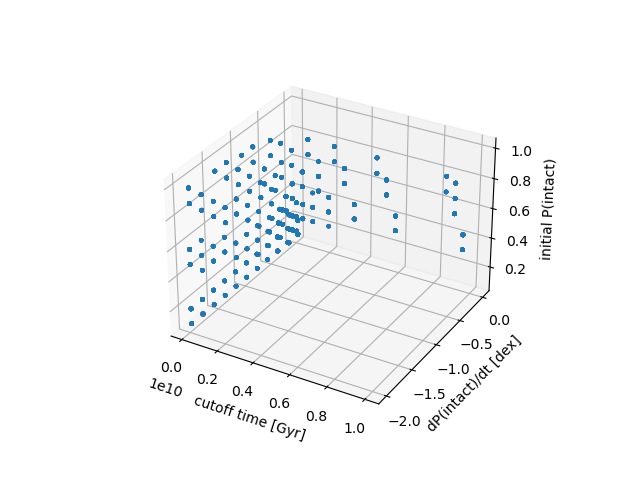

In [9]:
%matplotlib widget

#df_keep['intact_frac_over_planets'] = df_keep.intact_frac/(df_keep.intact_frac+df_keep.disrupted_frac)
#df_keep = df_keep.loc[df_keep.corrected_logL >= threshold] # rule out models based on transit multiplicity
print("remaining based on transit multiplicity: ", len(df_keep))
#df_keep = df_keep.loc[(df_keep.intact_frac2 <= 0.44) & (df_keep.intact_frac2 >= 0.12)]
print("remaining after ruling out intact fractions: ", len(df_keep))
#df_keep = df
fig = plt.figure()
ax = plt.axes(projection='3d')

#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, c=df_keep.normalized_logL, s=5)
im = ax.scatter3D(df_keep.fixed_c, df_keep.m, df_keep.b, s=5)
#im1 = ax.scatter3D(df_keep.loc[df_keep.index==1220].c, df_keep.loc[df_keep.index==1220].m, df_keep.loc[df_keep.index==1220].b, s=8, c='r')
#im2 = ax.scatter3D(df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, s=8, c='purple')
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.show()

Fraction of planet hosts vs normalized logL

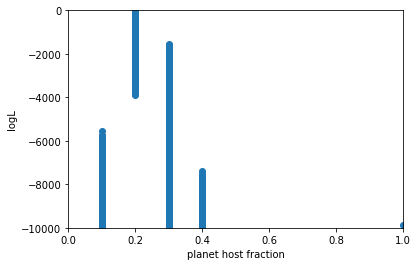

In [10]:
%matplotlib inline

plt.scatter(df.f, df.normalized_logL_zero_bin)
plt.xlabel('planet host fraction')
plt.ylabel('logL')
plt.ylim([-10000, 0])
plt.xlim([0, 1])
plt.savefig('f_v_logL.pdf', format='pdf')
plt.show()

In [29]:
# based on the plot above, impose the assumption that f=0.2
#df_keep = df_keep.loc[df_keep.f == 0.2]


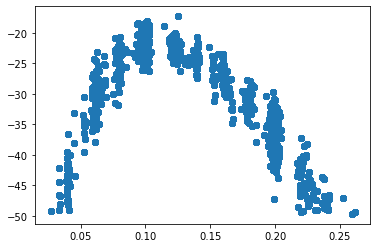

In [252]:
plt.scatter(df_keep.intact_frac2, df_keep.normalized_logL)
plt.show()

# models that fit 1+ bins, which include all f's because they're normalized. 
# I expect 8/30, or 27%. This greatly underestimates, by more than 50%. This is concerning.

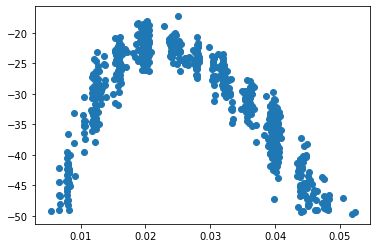

In [253]:
plt.scatter(df_keep3.intact_frac2*df_keep3.f, df_keep3.normalized_logL)
plt.show()

# models that fit 1+ bins AND f=0.2. 
# I expect 8% of FGK dwarfs to be intact
# Now that I fold in f, this underestimates by 75%. Also way more than the expected 1/3.

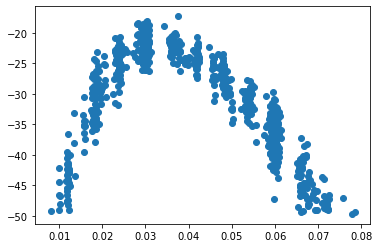

In [254]:
plt.scatter(df_keep5.intact_frac2*df_keep5.f, df_keep5.normalized_logL)
# models that fit 1+ bins AND f=0.3
# by this logic, it seems f=0.8 is required in order to get 8% intact fraction
plt.show()

In [11]:
test = pd.read_csv('hipergator/transits8_5_7_0.csv')
print(test)
intact = test.loc[test.intact_flag=='intact']
disrupted = test.loc[test.intact_flag=='disrupted']

print(len(test), len(test.kepid.unique()))

print(len(intact.kepid.unique())/len(test.kepid.unique()))
print(len(disrupted.kepid.unique())/len(test.kepid.unique()))

        Unnamed: 0     kepid           tm_designation  teff  teff_err1  \
0                0    757280  2MASS J19242289+3633538  6543      162.0   
1                1    892195  2MASS J19240520+3638374  5522      194.0   
2                2    892667  2MASS J19243045+3637186  6609      159.0   
3                3    892678  2MASS J19243108+3638316  6137      167.0   
4                4    892713  2MASS J19243353+3637220  6106      186.0   
...            ...       ...                      ...   ...        ...   
102187       67377  12984000  2MASS J19194837+5225067  5835      174.0   
102188       67377  12984000  2MASS J19194837+5225067  5835      174.0   
102189       67378  12984200  2MASS J19201625+5224552  5862      161.0   
102190       67379  12984307  2MASS J19202959+5228286  5802      205.0   
102191       67379  12984307  2MASS J19202959+5228286  5802      205.0   

        teff_err2   logg  logg_err1  logg_err2  feh_x  ...  intact_flag  \
0          -194.0  4.082      0.258 

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
def compute_prob(x, m, b, c):
    return b + m*(np.log10(x)-8)

def compute_prob_after_cutoff(x, m, b, c):
    return b + m*(np.log10(c)-8)

print(test.iso_age)
print(compute_prob(1.24e9, -0.4, 0.5,  2.51e9))
print(compute_prob(1.56e9, -0.4, 0.5,  2.51e9))
print(compute_prob(1.85e9, -0.4, 0.5,  2.51e9))
print(compute_prob_after_cutoff(1.24e9, -0.4, 0.5,  2.51e9))
print(len(test.loc[test.iso_age < 2.51])/len(test)) # fraction of stars younger than c
print(len(test.loc[test.iso_age < 1.8])/len(test)) # fraction of stars with P(intact)>0


0          1.24
1         14.31
2          1.56
3          1.85
4          1.44
          ...  
102187     4.44
102188     4.44
102189     5.81
102190     5.33
102191     5.33
Name: iso_age, Length: 102192, dtype: float64
0.06263132593510573
0.02275016065821517
-0.006868691361205492
-0.059869488592415365
0.2010920620009394
0.10718060122123063


Do these normalized, 1+ bin fits match up with the expected intact fraction of 8%? (ie. Now using 20% as the fraction of planet-hosting stars, we'd expect logL to peak at 8 out of 20 planet-hosting stars as being intact, or 40%.)

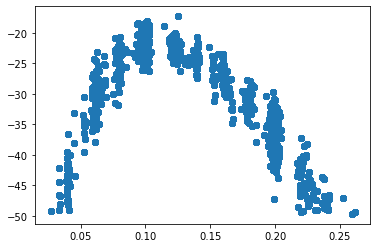

In [21]:
plt.scatter(df_keep.intact_frac2, df_keep.normalized_logL)
plt.show()

Do intact systems harbor closer-in planets than disrupted ones? Answering this question will determine whether our pipeline's differing sensitivity might have an imbalanced effect on intact vs disrupted systems, thereby underestimating one vs the other.

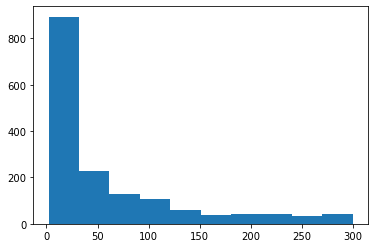

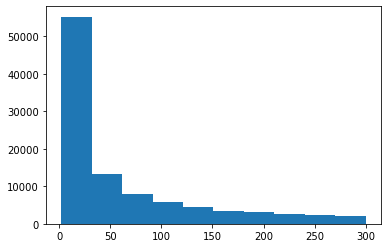

In [22]:
# do intact systems harbor closer-in planets than disrupted ones? 
# answering this question will determine whether our pipeline's differing sensitivity might have 
# an imbalanced effect on intact vs disrupted systems, thereby underestimating one vs the other
plt.hist(intact.P)
plt.show()

plt.hist(disrupted.P)
plt.show()

Oh yeah, duh, all this does is confirm that I drew periods from logU(2,300) regardless of system flag. 

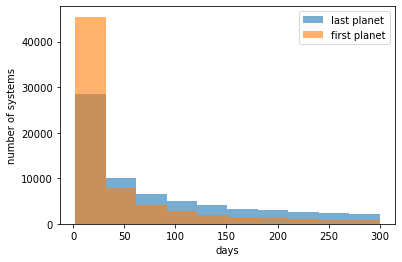

In [23]:
plt.hist(test.groupby('kepid').max('P').P, label='last planet', alpha=0.6)
plt.hist(test.groupby('kepid').min('P').P, label='first planet', alpha=0.6)
plt.xlabel('days')
plt.ylabel('number of systems')
plt.legend()
plt.show()

In [24]:
nonzero_k

0    66355
1      833
2      134
3       38
4       15
5        5
6        0
dtype: int64

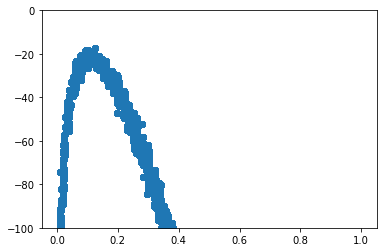

In [25]:
plt.scatter(df.intact_frac2, df.normalized_logL)
plt.ylim([-100, 0])
plt.show()

#### June 22, 2022

Re-creating Moriarty & Ballard 2016

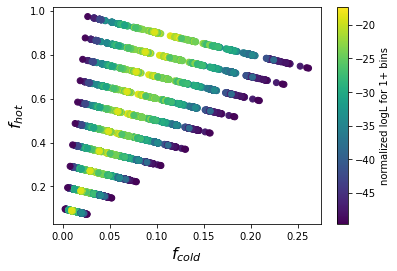

In [13]:
f_cool = df_keep.intact_frac2*df_keep.f
f_hot = df_keep.disrupted_frac2*df_keep.f
plt.scatter(f_cool, f_hot, c=df_keep.normalized_logL)
plt.xlabel('$f_{cold}$', fontsize=16)
plt.ylabel('$f_{hot}$', fontsize=16)
cbar = plt.colorbar()
cbar.set_label('normalized logL for 1+ bins')
plt.show()

In [27]:
print(k)
print(np.sum(k))

0    833
1    134
2     38
3     15
4      5
5      0
dtype: int64
1025


Multis are twice as likely to present a transit than singles. So I'd expect that the 1 bin is two-thirds multis and one-third bona fide singles. One third of 833 is 200-300. Which means I'd expect 25% of planet host systems to be intact systems. By peaking at 10%, we are underestimating by 60% from the expected intact fraction. This looks bad.

fixed_c  1.000000e+08  1.584893e+08  2.511886e+08  3.981072e+08  6.309573e+08  \
b                                                                               
0.1      1.540293e-08  7.865642e-13           NaN           NaN           NaN   
0.2      3.327789e-14  5.494216e-10  1.026479e-09  1.724083e-10  1.803223e-17   
0.3               NaN  2.610803e-09  1.733827e-10  3.027691e-13  8.476500e-11   
0.4               NaN  5.499173e-10  6.970385e-11  2.108125e-12  1.772759e-10   
0.5               NaN  9.871820e-10  2.351056e-09  9.919108e-12  7.504940e-14   
0.6               NaN  8.304121e-16  1.248104e-10  5.402434e-10  1.536118e-10   
0.7               NaN           NaN  5.173859e-11  2.991940e-10  4.948727e-13   
0.8               NaN           NaN  3.400298e-11  7.218796e-12  1.384226e-11   
0.9               NaN           NaN  5.816809e-10  1.622219e-13  7.803646e-10   
1.0               NaN           NaN  3.452870e-16  1.673354e-12  3.015563e-15   

fixed_c  1.000000e+09  1.58

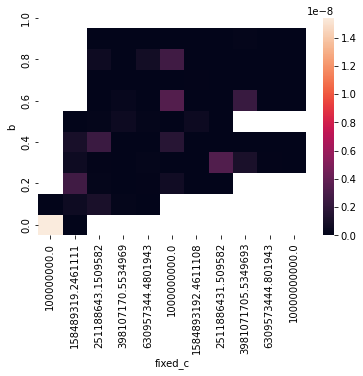

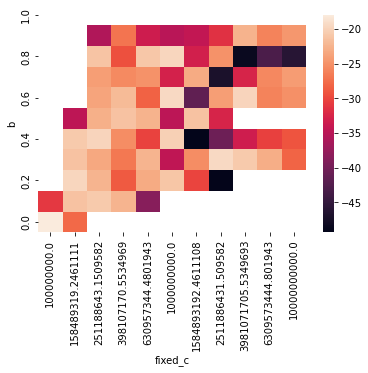

In [120]:
%matplotlib inline
import matplotlib.ticker as ticker

cvals = np.logspace(8, 10, 11)
mvals = np.linspace(-2, 0, 11)
bvals = np.linspace(0, 1, 11)
###tick = ticker.ScalarFormatter(useOffset=True, useMathText=True)
#tick.set_powerlimits((0,0))
###tc = [u"${}$".format(tick.format_data(x)) for x in cvals]
#tc = [u"${}$".format(tick.format_data(x)) for x in cvals]
#"${}$".format(f._formatSciNotation('%1.10e' % x))

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','fixed_c']).sum('normalized_likelihood').reset_index()
piv = df_keep.groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','fixed_c']).sum('normalized_likelihood').reset_index()
#piv = df.loc[df.f == 0.2].groupby(['b','fixed_c','m']).agg({'normalized_likelihood_zero_bin': [np.nanmean]}).reset_index().groupby(['b','fixed_c']).sum('normalized_likelihood_zero_bin').reset_index()
#print(piv)

#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
#print(piv['normalized_likelihood_zero_bin'])

#piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("b", "fixed_c","normalized_likelihood")
#print(np.log(piv))
print(piv)
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))

#sns.heatmap(piv, fmt='.1e')
ax = sns.heatmap(piv, #xticklabels=tc,
                 yticklabels=df.b.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.show()

ax = sns.heatmap(np.log(piv), fmt='.1e', #xticklabels=tc,
                 yticklabels=df.b.unique().round(1)) # choose vmax as max of the three heatmaps' vmaxes; same idea for vmin
#ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
fig.tight_layout()
#plt.savefig('marginalize_m_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

fixed_c   1.000000e+08  1.584893e+08  2.511886e+08  3.981072e+08  \
b                                                                  
0.0       3.640461e-67  1.751538e-67  2.174370e-67  6.074367e-68   
0.1       1.540293e-08  7.865642e-13  4.439199e-32  1.332584e-67   
0.2       3.327789e-14  5.494216e-10  1.026479e-09  1.724083e-10   
0.3       3.137266e-28  2.610803e-09  1.733827e-10  3.027691e-13   
0.4       1.478920e-46  5.499173e-10  6.970385e-11  2.108125e-12   
0.5       9.166578e-70  9.871820e-10  2.351056e-09  9.919108e-12   
0.6       9.977837e-91  8.303546e-16  1.248104e-10  5.402434e-10   
0.7      2.547378e-118  1.808122e-30  5.173859e-11  2.991940e-10   
0.8      3.902307e-141  2.973900e-49  3.400298e-11  7.218796e-12   
0.9      1.743296e-170  9.162665e-73  5.816809e-10  1.622219e-13   
1.0      5.411027e-198  2.490133e-96  3.452870e-16  1.673354e-12   

fixed_c  6.309573e+08  1.000000e+09  1.584893e+09  2.511886e+09  3.981072e+09  \
b                                 

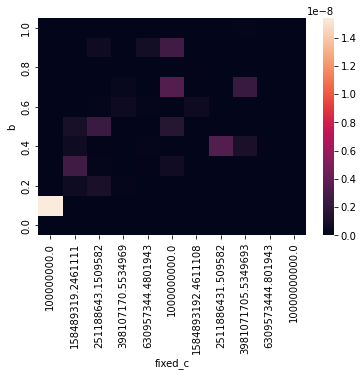

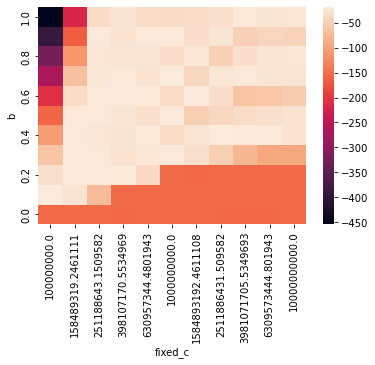

In [30]:
%matplotlib inline
import matplotlib.ticker as ticker

cvals = np.logspace(8, 10, 11)
mvals = np.linspace(-2, 0, 11)
bvals = np.linspace(0, 1, 11)
###tick = ticker.ScalarFormatter(useOffset=True, useMathText=True)
#tick.set_powerlimits((0,0))
###tc = [u"${}$".format(tick.format_data(x)) for x in cvals]
#tc = [u"${}$".format(tick.format_data(x)) for x in cvals]
#"${}$".format(f._formatSciNotation('%1.10e' % x))

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','fixed_c']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','fixed_c']).sum('normalized_likelihood').reset_index()
#piv = df.loc[df.f == 0.2].groupby(['b','fixed_c','m']).agg({'normalized_likelihood_zero_bin': [np.nanmean]}).reset_index().groupby(['b','fixed_c']).sum('normalized_likelihood_zero_bin').reset_index()
#print(piv)

#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
#print(piv['normalized_likelihood_zero_bin'])

#piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("b", "fixed_c","normalized_likelihood")
#print(np.log(piv))
print(piv)
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))

#sns.heatmap(piv, fmt='.1e')
ax = sns.heatmap(piv, #xticklabels=tc,
                 yticklabels=df.b.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.show()

ax = sns.heatmap(np.log(piv), fmt='.1e', #xticklabels=tc,
                 yticklabels=df.b.unique().round(1)) # choose vmax as max of the three heatmaps' vmaxes; same idea for vmin
#ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
fig.tight_layout()
#plt.savefig('marginalize_m_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

Dropping records from df to df_keep makes the heatmaps really ratty.

#### 6/20/22

In [28]:
df_not_keep = df.loc[~(df.normalized_logL >= threshold)] 
print(len(df_not_keep), len(df_keep), len(df))
print(np.nansum(df_not_keep.normalized_likelihood), np.nansum(df_keep.normalized_likelihood))
print(np.nansum(df_not_keep.normalized_logL), np.nansum(df_keep.normalized_logL))

68570 9750 78320
1.5280248617290368e-20 3.918741797127091e-06
-10674365.143503036 -295292.6152696953


What do the zero-bin-included transit multiplicities look like for the best (normalized) models?

In [31]:
df_keep.reset_index().normalized_transit_multiplicity_zero_bin

0       [143552.1404647268, 853.7732886749005, 116.725...
1       [144588.53573687538, 865.944549862956, 101.786...
2       [144435.1937657961, 858.5562342038754, 109.019...
3       [145608.75796178344, 858.3014861995754, 108.15...
4       [150001.67832932426, 847.0314891755959, 118.79...
                              ...                        
9745    [12796.192715629377, 778.4420652391435, 128.81...
9746    [12835.024081878386, 789.4742123218945, 125.68...
9747    [12902.102238354508, 772.8322242387578, 137.86...
9748    [12782.377049180328, 774.3852459016393, 137.70...
9749    [13124.661954517516, 778.2524072935873, 137.33...
Name: normalized_transit_multiplicity_zero_bin, Length: 9750, dtype: object

In [14]:
### second wave of cuts
df_keep2 = df_keep.loc[(df_keep.f == 0.2) & (df_keep.normalized_logL_zero_bin > -100)]
df_not_keep2 = df_keep.loc[~(df_keep.f == 0.2) | ~(df_keep.normalized_logL_zero_bin > -100)]
print(len(df_keep2), len(df_not_keep2), len(df_keep))

### assess again
# tossed out models
print(len(df_not_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index()))

# surviving models
print(len(df_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index()))

# total models, if we count one model per 4-d sub-cube
print(len(df.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index()))

296 9454 9750
1353
61
13398


In [15]:
### intermediate cuts
df_keep3 = df_keep.loc[df_keep.f == 0.2]
df_not_keep3 = df_keep.loc[~(df_keep.f == 0.2)]
df_keep4 = df_keep.loc[df_keep.normalized_logL_zero_bin > -100]
df_not_keep4 = df_keep.loc[~(df_keep.normalized_logL_zero_bin > -100)]
df_keep5 = df_keep.loc[np.round(df_keep.f,1) == 0.3]
df_not_keep5 = df_keep.loc[~(np.round(df_keep.f,1) == 0.3)]
print(len(df_keep3), len(df_not_keep3), len(df_keep4), len(df_not_keep4), len(df_keep5), len(df_not_keep5), len(df_keep))

### assess again
# tossed out models
print(len(df_not_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index()))

# surviving models
print(len(df_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index()))

# tossed out models
print(len(df_not_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index()))

# surviving models
print(len(df_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index()))

# tossed out models
print(len(df_not_keep5.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index()))

# surviving models
print(len(df_keep5.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index()))

# total models, if we count one model per 4-d sub-cube
print(len(df_keep.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index()))

975 8775 296 9454 975 8775 9750
1233
137
1353
61
1233
137
1370


In [ ]:
"""
print(df_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c','f','b']).count())
print(df_not_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c','f','b']).count())
print(df_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c','f','b']).count())
print(df_not_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c','f','b']).count())
print(df_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c','f','b']).count())
print(df_not_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c','f','b']).count())
"""


In [35]:
print(df_keep.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood.sum())
print(df_not_keep.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood.sum())
print(df_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood.sum())
print(df_not_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood.sum())
print(df_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood.sum())
print(df_not_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood.sum())
print(df_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood.sum())
print(df_not_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood.sum())
print(df_keep5.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood.sum())
print(df_not_keep5.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood.sum())

4.265561608148478e-07
5.301605137839221e-21
7.517511392440222e-10
4.2653935580950303e-07
4.265561608148746e-08
3.839005447333603e-07
7.517511392440222e-10
4.2653935580950303e-07
4.265561608148202e-08
3.839005447333658e-07


In [37]:
print(np.nanmean(df_keep.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood))
print(np.nanmean(df_not_keep.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood))
print(np.nanmean(df_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood))
print(np.nanmean(df_not_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood))
print(np.nanmean(df_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood))
print(np.nanmean(df_not_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood))
print(np.nanmean(df_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood))
print(np.nanmean(df_not_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood))
print(np.nanmean(df_keep5.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood))
print(np.nanmean(df_not_keep5.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood))

print("")

print(np.nanmean(df_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood_zero_bin').normalized_likelihood_zero_bin))
print(np.nanmean(df_keep5.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood_zero_bin').normalized_likelihood_zero_bin))


3.1135486190864803e-10
4.832821456553529e-25
1.232378916793479e-11
3.1525451279342424e-10
3.1135486190866757e-10
3.113548619086458e-10
1.232378916793479e-11
3.1525451279342424e-10
3.1135486190862786e-10
3.1135486190865025e-10

5.41415490914035e-21
0.0


Wait, what gives, re: f=0.3?

In [239]:
np.exp(df_keep5['normalized_logL_zero_bin'])

1240     0.0
1241     0.0
1242     0.0
1243     0.0
1244     0.0
        ... 
74417    0.0
74418    0.0
74419    0.0
74420    0.0
74421    0.0
Name: normalized_logL_zero_bin, Length: 975, dtype: float64

In [243]:
df_keep3['normalized_logL_zero_bin']

1230    -200.647628
1231    -243.125175
1232    -232.818066
1233    -280.456158
1234    -487.056135
            ...    
74407    -67.705701
74408    -70.542064
74409    -81.125030
74410    -64.985424
74411   -123.480936
Name: normalized_logL_zero_bin, Length: 975, dtype: float64

In [242]:
df_keep5['normalized_logL_zero_bin']

1240    -3488.018451
1241    -3354.293653
1242    -3370.053748
1243    -3218.220704
1244    -2678.698549
            ...     
74417   -4438.418630
74418   -4375.104820
74419   -4271.437677
74420   -4459.235654
74421   -3934.890957
Name: normalized_logL_zero_bin, Length: 975, dtype: float64

Oh yeah. That means f=0.3 is so bad for the zero bins, even though it's sometimes fine for the 1+ bins. Once again, we're facing the outsized impact of f on the zero-bin transit multiplicity fits. 

In [ ]:
"""
print(df_keep.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood)
print(df_not_keep.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood)
print(df_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood)
print(df_not_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood)
print(df_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood)
print(df_not_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood)
print(df_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood)
print(df_not_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').normalized_likelihood)
"""

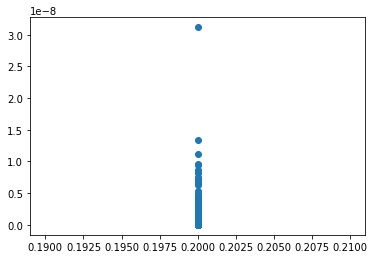

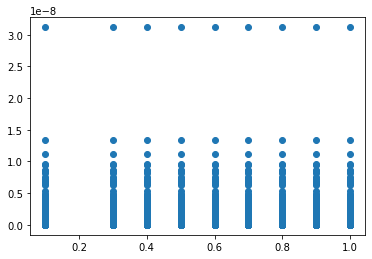

In [39]:
plt.scatter(df_keep3.f, df_keep3.normalized_likelihood)
plt.show()

plt.scatter(df_not_keep3.f, df_not_keep3.normalized_likelihood)
plt.show()

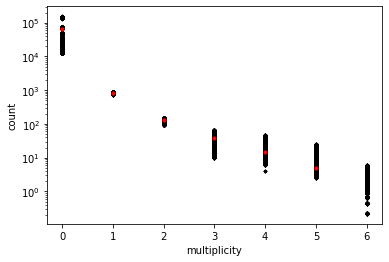

In [67]:
%matplotlib inline

for i in range(len(df_keep)):
    try:
        plt.scatter(np.arange(7), df_keep.reset_index().normalized_transit_multiplicity_zero_bin[i], s=5, color='k')
    except:
        pass
plt.scatter(np.arange(7), nonzero_k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.show()

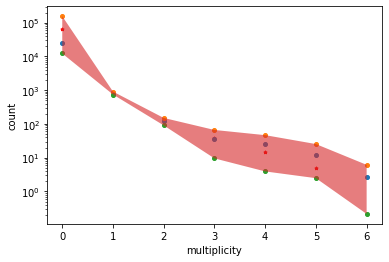

In [41]:
%matplotlib inline
from itertools import zip_longest
import numpy.ma as ma # for masked arrays

lam_elt_max = []
lam_elt_min = []
lam_elt_med = []
for temp_list in zip_longest(*df_keep.normalized_transit_multiplicity_zero_bin):
    elt = [0 if v is None else v for v in ma.masked_values(temp_list, 0)]
    lam_elt_max.append(max(elt))
    lam_elt_min.append(min(elt))
    lam_elt_med.append(np.median(elt))
    
# plotting
plt.scatter(np.arange(7), nonzero_k, marker=(5, 1), color='r', s=10)
plt.scatter(np.arange(7), lam_elt_med, s=16)
plt.scatter(np.arange(7), lam_elt_max, s=16)
plt.scatter(np.arange(7), lam_elt_min, s=16)
        
# draw envelope
plt.fill_between(np.arange(len(lam_elt_min)), lam_elt_min, lam_elt_max, alpha=0.6)

plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.show()

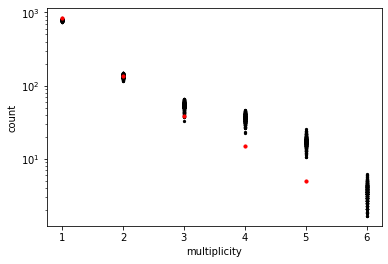

In [206]:
%matplotlib inline

for i in range(len(df_keep2)):
    try:
        plt.scatter(np.arange(7)[1:], df_keep2.reset_index().normalized_transit_multiplicity[i], s=5, color='k')
    except:
        pass
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.show()

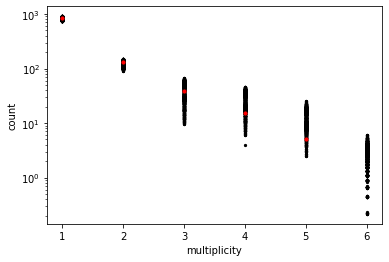

In [207]:
%matplotlib inline

for i in range(len(df_keep3)):
    try:
        plt.scatter(np.arange(7)[1:], df_keep3.reset_index().normalized_transit_multiplicity[i], s=5, color='k')
    except:
        pass
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.show()

[65562.44697261859, 746.5376280535855, 90.66171580580804, 9.532772364924712, 3.920134983127109, 2.470962086346702, 0.21538138264341247] [70797.48336106488, 826.5988987717069, 121.4643880474826, 36.318897637795274, 25.17396643471142, 12.054016344428941, 2.605932203389831] [77457.38636363637, 909.4458571731299, 150.79563650920736, 66.35814690160365, 46.56318190835152, 25.355473315153876, 6.134051466187912]


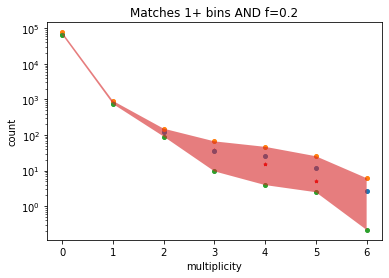

In [287]:
lam_elt_max = []
lam_elt_min = []
lam_elt_med = []
for temp_list in zip_longest(*df_keep3.normalized_transit_multiplicity_zero_bin):
    elt = [0 if v is None else v for v in ma.masked_values(temp_list, 0)]
    lam_elt_max.append(max(elt))
    lam_elt_min.append(min(elt))
    lam_elt_med.append(np.median(elt))
    
# plotting
plt.scatter(np.arange(7), nonzero_k, marker=(5, 1), color='r', s=10)
plt.scatter(np.arange(7), lam_elt_med, s=16)
plt.scatter(np.arange(7), lam_elt_max, s=16)
plt.scatter(np.arange(7), lam_elt_min, s=16)
        
print(lam_elt_min, lam_elt_med, lam_elt_max)
# draw envelope
plt.fill_between(np.arange(len(lam_elt_min)), lam_elt_min, lam_elt_max, alpha=0.6)

plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.title('Matches 1+ bins AND f=0.2')
plt.show()

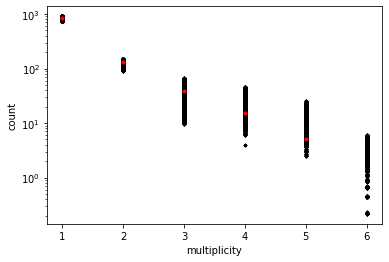

In [209]:
%matplotlib inline

for i in range(len(df_not_keep3)):
    try:
        plt.scatter(np.arange(7)[1:], df_not_keep3.reset_index().normalized_transit_multiplicity[i], s=5, color='k')
    except:
        pass
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.show()

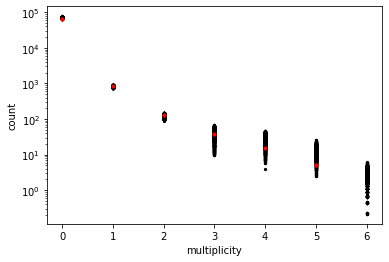

In [232]:
%matplotlib inline

for i in range(len(df_keep3)):
    try:
        plt.scatter(np.arange(7), df_keep3.reset_index().normalized_transit_multiplicity_zero_bin[i], s=5, color='k')
    except:
        pass
plt.scatter(np.arange(7), nonzero_k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.show()

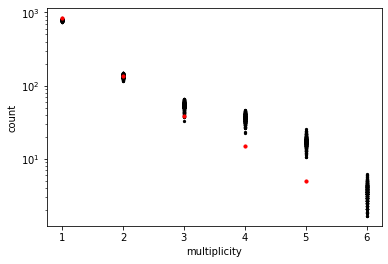

In [208]:
%matplotlib inline

for i in range(len(df_keep4)):
    try:
        plt.scatter(np.arange(7)[1:], df_keep4.reset_index().normalized_transit_multiplicity[i], s=5, color='k')
    except:
        pass
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.show()

[746.5376280535855, 115.25768995722143, 32.612686110544566, 22.291666666666668, 10.416666666666666, 1.65489404641776] [778.4470905260305, 136.02576350185106, 53.37032451242409, 36.29217375819475, 17.173635466089436, 3.525545521107614] [832.2506628594738, 150.79563650920736, 66.35814690160365, 46.56318190835152, 25.355473315153876, 6.134051466187912]


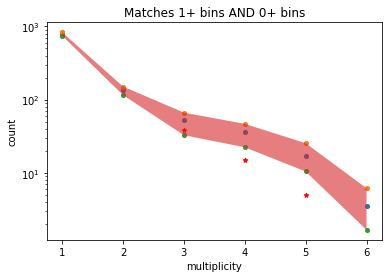

In [291]:
lam_elt_max = []
lam_elt_min = []
lam_elt_med = []
for temp_list in zip_longest(*df_keep4.normalized_transit_multiplicity):
    elt = [0 if v is None else v for v in ma.masked_values(temp_list, 0)]
    lam_elt_max.append(max(elt))
    lam_elt_min.append(min(elt))
    lam_elt_med.append(np.median(elt))
    
# plotting
plt.scatter(np.arange(7)[1:], k, marker=(5, 1), color='r', s=20)
plt.scatter(np.arange(7)[1:], lam_elt_med, s=16)
plt.scatter(np.arange(7)[1:], lam_elt_max, s=16)
plt.scatter(np.arange(7)[1:], lam_elt_min, s=16)
        
print(lam_elt_min, lam_elt_med, lam_elt_max)
# draw envelope
plt.fill_between(np.arange(7)[1:], lam_elt_min, lam_elt_max, alpha=0.6)

plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.title('Matches 1+ bins AND 0+ bins')
plt.show()

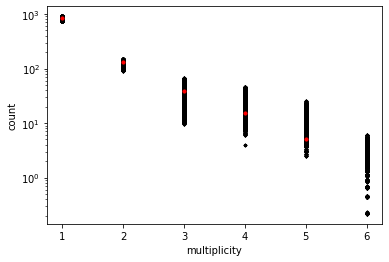

In [217]:
%matplotlib inline

for i in range(len(df_not_keep4)):
    try:
        plt.scatter(np.arange(7)[1:], df_not_keep4.reset_index().normalized_transit_multiplicity[i], s=5, color='k')
    except:
        pass
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.show()

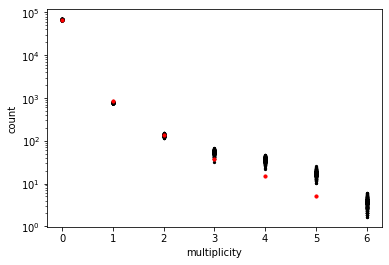

In [212]:
%matplotlib inline

for i in range(len(df_keep4)):
    try:
        plt.scatter(np.arange(7), df_keep4.reset_index().normalized_transit_multiplicity_zero_bin[i], s=5, color='k')
    except:
        pass
plt.scatter(np.arange(7), nonzero_k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.show()

In [213]:
print(len(df_not_keep4))

9454


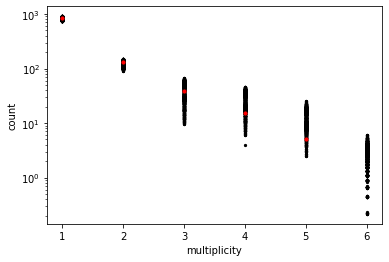

In [229]:
%matplotlib inline

for i in range(len(df_keep5)):
    try:
        plt.scatter(np.arange(7)[1:], df_keep5.reset_index().normalized_transit_multiplicity[i], s=5, color='k')
    except:
        pass
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.show()

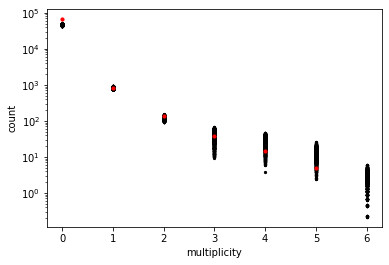

In [231]:
%matplotlib inline

for i in range(len(df_keep5)):
    try:
        plt.scatter(np.arange(7), df_keep5.reset_index().normalized_transit_multiplicity_zero_bin[i], s=5, color='k')
    except:
        pass
plt.scatter(np.arange(7), nonzero_k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.show()

[43366.63131507905, 746.5376280535855, 90.66171580580803, 9.532772364924712, 3.920134983127109, 2.470962086346702, 0.21538138264341247] [46856.65557404326, 826.5988987717068, 121.4643880474826, 36.318897637795274, 25.17396643471142, 12.054016344428941, 2.6059322033898304] [51296.590909090904, 909.4458571731299, 150.79563650920736, 66.35814690160365, 46.563181908351524, 25.35547331515388, 6.134051466187912]


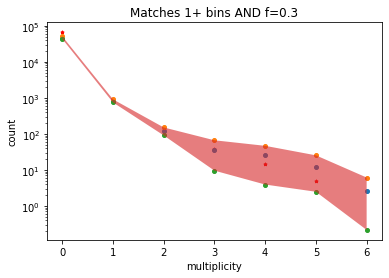

In [288]:
lam_elt_max = []
lam_elt_min = []
lam_elt_med = []
for temp_list in zip_longest(*df_keep5.normalized_transit_multiplicity_zero_bin):
    elt = [0 if v is None else v for v in ma.masked_values(temp_list, 0)]
    lam_elt_max.append(max(elt))
    lam_elt_min.append(min(elt))
    lam_elt_med.append(np.median(elt))
    
# plotting
plt.scatter(np.arange(7), nonzero_k, marker=(5, 1), color='r', s=10)
plt.scatter(np.arange(7), lam_elt_med, s=16)
plt.scatter(np.arange(7), lam_elt_max, s=16)
plt.scatter(np.arange(7), lam_elt_min, s=16)
        
print(lam_elt_min, lam_elt_med, lam_elt_max)
# draw envelope
plt.fill_between(np.arange(len(lam_elt_min)), lam_elt_min, lam_elt_max, alpha=0.6)

plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.title('Matches 1+ bins AND f=0.3')
plt.show()

### Marginalized and marginalized joint posteriors

5.74357649162408e-20 4.4172811798130854e-08 4.2655616081484773e-07 -2070.9760692445643 -14.667521800336857
-44.30361976142006 -16.93515635481461


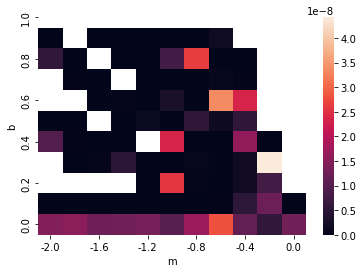

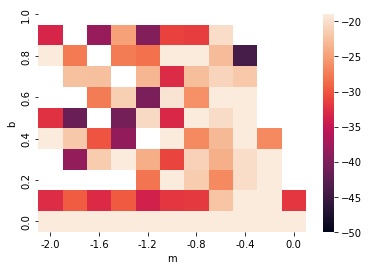

In [61]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
piv = df_keep.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("b", "m","normalized_likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.show()

#ax = sns.heatmap(np.log(piv), vmin=-455, vmax=-17.9, xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
ax = sns.heatmap(np.log(piv), vmin=-50, vmax=-19, xticklabels=df.m.unique().round(1), 
                 yticklabels=df.b.unique().round(1))

ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()

fig.tight_layout()
#plt.savefig('marginalize_c_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

m            -2.0          -1.8          -1.6          -1.4          -1.2  \
b                                                                           
0.1  1.459664e-08  1.569665e-08  1.247788e-08  1.285761e-08  1.342461e-08   
0.2  5.886677e-15  1.331961e-13  4.721801e-15  1.232690e-13  1.970530e-15   
0.3           NaN           NaN           NaN           NaN  6.973825e-13   
0.4           NaN  1.767938e-17  4.249872e-10  5.030448e-09  4.370378e-11   
0.5  9.534390e-09  3.373463e-10  8.398317e-14  1.588603e-17           NaN   
0.6  8.303258e-15  8.625550e-19           NaN  1.970007e-18  1.248100e-09   
0.7           NaN           NaN  1.117016e-12  5.162689e-10  2.845217e-18   
0.8           NaN  1.730440e-10  1.669858e-10           NaN  7.218259e-11   
0.9  5.815831e-09  9.780899e-13           NaN  1.101489e-12  5.207302e-13   
1.0  3.452870e-15           NaN  2.582810e-17  1.673351e-11  5.118236e-18   

m            -1.0          -0.8          -0.6          -0.4          -0.2  

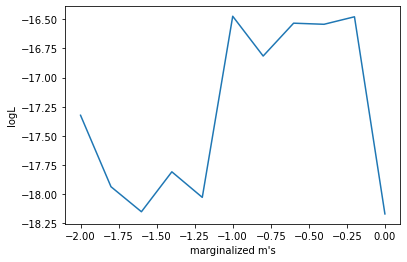

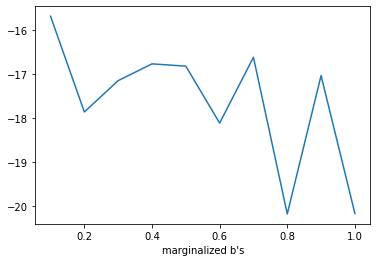

In [62]:
b_vs_m = np.zeros(len(piv))
m_vs_b = np.zeros(len(piv.T))
print(piv)
for i, j in enumerate(piv.T):
    b_vs_m[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    m_vs_b[i] = np.nansum(piv[j])
    
plt.plot(piv.columns, np.log(m_vs_b))
plt.xlabel("marginalized m's")
plt.ylabel('logL')
#plt.savefig('marginalized_m.pdf', format='pdf')
plt.show()

plt.plot(piv.T.columns, np.log(b_vs_m))
plt.xlabel("marginalized b's")
plt.show()

5.3165533213810756e-197 4.41728117981236e-08 4.2655616077508133e-07 -7444.714975959325 -14.667521800430084
-451.938438098354 -16.935156354814772


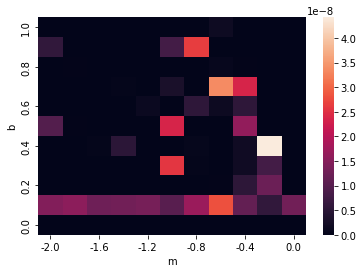

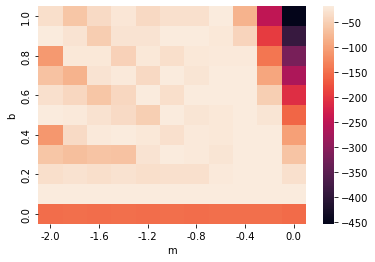

In [118]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("b", "m","normalized_likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.show()

#ax = sns.heatmap(np.log(piv), vmin=-455, vmax=-17.9, xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
ax = sns.heatmap(np.log(piv), vmin=-454, vmax=-19, xticklabels=df.m.unique().round(1), 
                 yticklabels=df.b.unique().round(1))

ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()

fig.tight_layout()
#plt.savefig('marginalize_c_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [119]:
piv.T

b,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
m,,,,,,,,,,,
-2.0,1.195579e-66,1.459664e-08,5.886677e-15,1.166550e-27,5.046461e-49,9.534390e-09,8.303258e-15,1.808122e-29,2.973900e-48,5.815831e-09,3.452870e-15
-1.8,1.565792e-66,1.569665e-08,1.331961e-13,5.743621e-31,1.767938e-17,3.373463e-10,2.878637e-19,2.552237e-36,1.730440e-10,9.780899e-13,7.619785e-28
-1.6,5.546815e-67,1.247788e-08,4.721801e-15,8.059513e-29,4.249872e-10,8.398317e-14,1.911014e-27,1.117016e-12,1.669858e-10,2.244146e-24,2.582810e-17
-1.4,3.161708e-66,1.285761e-08,1.232690e-13,1.509127e-29,5.030448e-09,1.588603e-17,1.313354e-18,5.162689e-10,3.899074e-22,1.101489e-12,1.673351e-11
-1.2,9.205414e-67,1.342461e-08,1.970530e-15,6.973825e-13,4.370378e-11,1.333953e-23,1.248100e-09,2.845217e-18,7.218259e-11,5.207302e-13,3.412250e-18
-1.0,1.745525e-66,1.013414e-08,1.242143e-14,2.569618e-08,3.411099e-14,2.350775e-08,4.280899e-15,2.991940e-09,5.372433e-15,7.803646e-09,3.015051e-14
-0.8,1.188944e-66,1.698183e-08,1.658262e-14,4.097105e-10,6.477556e-10,2.818757e-12,5.402434e-09,4.948727e-12,1.384226e-10,2.623554e-08,1.920386e-14
-0.6,2.855658e-66,2.800429e-08,2.132833e-10,3.036161e-12,4.928290e-11,9.919108e-11,1.536118e-09,3.348606e-08,8.322204e-10,1.288480e-10,1.721000e-09
-0.4,1.855153e-66,1.130265e-08,5.190139e-09,1.734112e-09,1.793840e-09,1.606124e-08,5.406284e-09,2.362402e-08,3.395047e-10,4.038664e-20,5.336587e-37


m            -2.0          -1.8          -1.6          -1.4          -1.2  \
b                                                                           
0.0  1.195579e-66  1.565792e-66  5.546815e-67  3.161708e-66  9.205414e-67   
0.1  1.459664e-08  1.569665e-08  1.247788e-08  1.285761e-08  1.342461e-08   
0.2  5.886677e-15  1.331961e-13  4.721801e-15  1.232690e-13  1.970530e-15   
0.3  1.166550e-27  5.743621e-31  8.059513e-29  1.509127e-29  6.973825e-13   
0.4  5.046461e-49  1.767938e-17  4.249872e-10  5.030448e-09  4.370378e-11   
0.5  9.534390e-09  3.373463e-10  8.398317e-14  1.588603e-17  1.333953e-23   
0.6  8.303258e-15  2.878637e-19  1.911014e-27  1.313354e-18  1.248100e-09   
0.7  1.808122e-29  2.552237e-36  1.117016e-12  5.162689e-10  2.845217e-18   
0.8  2.973900e-48  1.730440e-10  1.669858e-10  3.899074e-22  7.218259e-11   
0.9  5.815831e-09  9.780899e-13  2.244146e-24  1.101489e-12  5.207302e-13   
1.0  3.452870e-15  7.619785e-28  2.582810e-17  1.673351e-11  3.412250e-18   

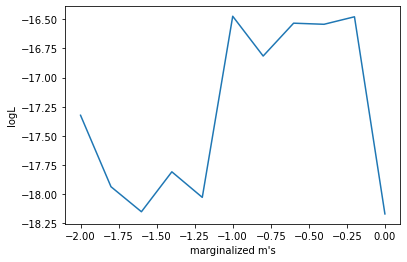

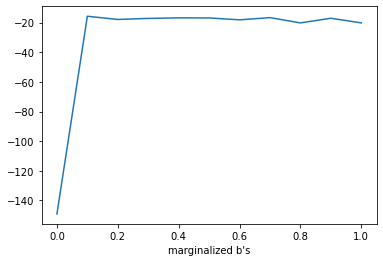

In [66]:
b_vs_m = np.zeros(len(piv))
m_vs_b = np.zeros(len(piv.T))
print(piv)
for i, j in enumerate(piv.T):
    b_vs_m[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    m_vs_b[i] = np.nansum(piv[j])
    
plt.plot(piv.columns, np.log(m_vs_b))
plt.xlabel("marginalized m's")
plt.ylabel('logL')
#plt.savefig('marginalized_m.pdf', format='pdf')
plt.show()

plt.plot(piv.T.columns, np.log(b_vs_m))
plt.xlabel("marginalized b's")
plt.show()

4.265561607750814e-07
4.2655616077508133e-07


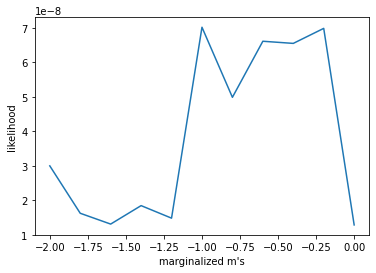

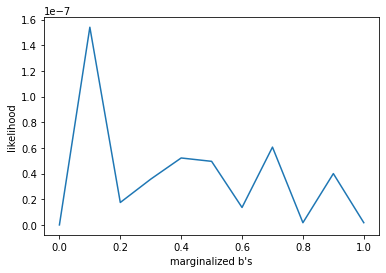

In [108]:
b_vs_m = np.zeros(len(piv))
m_vs_b = np.zeros(len(piv.T))

for i, j in enumerate(piv.T):
    m_vs_b[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    b_vs_m[i] = np.nansum(piv[j])
    
print(np.sum(b_vs_m))
print(np.sum(m_vs_b))

plt.plot(piv.columns, b_vs_m)
plt.xlabel("marginalized m's")
plt.ylabel('likelihood')
#plt.savefig('marginalized_m.pdf', format='pdf')
plt.show()

plt.plot(piv.T.columns, m_vs_b)
plt.xlabel("marginalized b's")
plt.ylabel('likelihood')
plt.show()

In [117]:
print(np.nanmedian(df.loc[df.m == 0].normalized_likelihood))
print(np.nanmedian(df.loc[df.m != 0].normalized_likelihood))
print(np.nanmedian(df.loc[df.m == 0].normalized_logL))
print(np.nanmedian(df.loc[df.m != 0].normalized_logL))
print("")

print(np.nanmean(df.loc[df.m == 0].normalized_likelihood))
print(np.nanmean(df.loc[df.m != 0].normalized_likelihood))
print(np.nanmean(df.loc[df.m == 0].normalized_logL))
print(np.nanmean(df.loc[df.m != 0].normalized_logL))

8.456397591014348e-51
2.5247643541791425e-69
-115.3964046574989
-157.95222413324245

2.0814917189742238e-10
3.892409828721798e-11
-147.55294338415032
-154.75393981105543


Remember, logging sums to get 1D marginalized posteriors introduces the same problem as before of the likelihoods not summing to the same numbers. I need to plot them unlogged, like above.

Grr. Look at the y-axes. They technically sum to the same, but only in that the b=0 contribution is really small in linear scale (ie. really big in negative log scale).

Ok, let's try with taking the mean and marginalized sums of the normalized_logL column instead.

-39157.331718560294 -216.2704534224094 -1895298.635692729


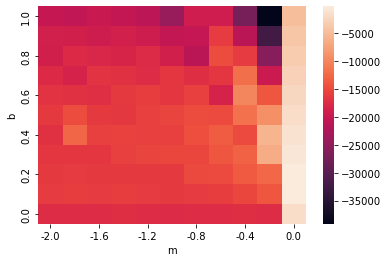

In [130]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','fixed_c','m','f']).mean('normalized_logL').reset_index().groupby(['b','m']).sum('normalized_logL').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv.pivot("b", "m","normalized_logL")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.show()

-1895298.6356927287
-1895298.635692729


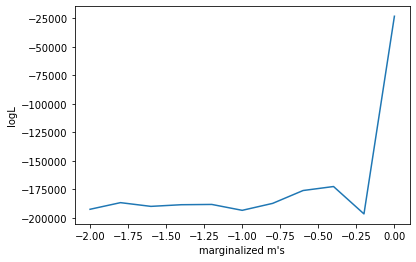

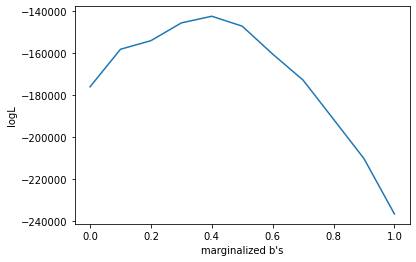

In [131]:
b_vs_m = np.zeros(len(piv))
m_vs_b = np.zeros(len(piv.T))

for i, j in enumerate(piv.T):
    m_vs_b[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    b_vs_m[i] = np.nansum(piv[j])
    
print(np.sum(b_vs_m))
print(np.sum(m_vs_b))

plt.plot(piv.columns, b_vs_m)
plt.xlabel("marginalized m's")
plt.ylabel('logL')
#plt.savefig('marginalized_m.pdf', format='pdf')
plt.show()

plt.plot(piv.T.columns, m_vs_b)
plt.xlabel("marginalized b's")
plt.ylabel('logL')
plt.show()

Oh wait. You can't add logLs. You can only...log adds. Which means it has to be normalized_likelihood.

5.848208653519187e-196 1.4112499332503835e-07 5.548517412718562e-07


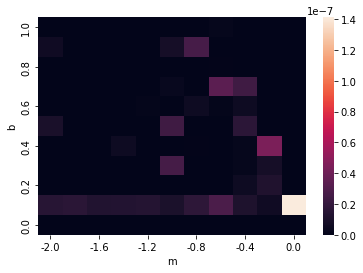

In [218]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv.pivot("b", "m","normalized_likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
#ax = sns.heatmap(np.log10(piv), xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.show()

In [219]:
# find and get peak of 2d marginalized posterior
print(np.array(piv).flatten()[np.argmax(piv)])

# try to roll the array one unit in all four directions and sum volume under that surface
#print(np.roll(piv, 1, axis=0))
print(np.roll(piv, 1, axis=0).flatten()[np.argmax(piv)]) # that's up!
print(np.roll(piv, 1, axis=1).flatten()[np.argmax(piv)]) # that's left!
print(np.roll(piv, -1, axis=0).flatten()[np.argmax(piv)]) # that's down!
print(np.roll(np.roll(piv, -1, axis=0), 1, axis=1).flatten()[np.argmax(piv)]) # that's down-left!
print(np.roll(piv, -1, axis=1).flatten()[np.argmax(piv)]) # that's right! ...uh oh, be careful about wraparounds. 

def explore_2d():
    return

def find_confidence_interval2d_old(array, percentile):
    #### manually find peak and then creep outward until I've taken over blah% area under the marginalized posterior...in 2D!
    
    coords = []
    arrays = []
    
    # stopping criterion
    stop = 0.01*percentile*np.nansum(array.values)
    
    # prior
    nope = -60 # in logL
    
    # initialize at peak likelihood
    area = 0
    arg = np.argmax(array) # flattened coordinate of peak
    arg2d = np.unravel_index(np.argmax(array), array.shape) # 2D coordinate of peak
    #print(arg, arg2d, np.ravel_multi_index(arg2d, dims=array.shape))
    #print(np.array(arg2d)+[0,1])
    #print(tuple(list(np.array(arg2d)+[0,1])))
    #print(np.ravel_multi_index(tuple(list(np.array(arg2d)+[0,1])), dims=array.shape))
    
    # get peak coordinates so I can keep track of when I'm near the boundary
    x_pos = arg2d[1]
    y_pos = arg2d[0]
    
    # save this off for function return
    peak_arg = arg 
    coords.append(arg)
    
    # save original array so I have something to index once I start rolling around
    og_array = array
    
    # update area
    area += np.array(array).flatten()[arg]
    
    while area < stop:
        
        ### explore surrounding tiles, starting up and going clockwise
        if y_pos != 0: # if not at top, I can go more up
            # roll
            array_temp = np.roll(array, 1, axis=0)
            arrays.append(array_temp)
            
            # get value
            tile = array_temp.flatten()[np.argmax(array)]
            arg2d_temp = np.unravel_index(np.argmax(array_temp), array.shape) # 2D coordinate of peak
            arg_temp = np.ravel_multi_index(tuple(list(np.array(arg2d)+[1,0])), dims=array.shape)
            # if area isn't under allowed logL value from prior and proposed coord isn't already in bag
            if (np.log10(tile) >= nope) & (np.isin(arg_temp, coords)==False):
                area += tile

                # add tile coordinates to bag
                coords.append(arg_temp)

        if (y_pos != 0) & (x_pos != 10): # up right
            tile = np.roll(np.roll(array, 1, axis=0), -1, axis=1).flatten()[np.argmax(array)]
            arg_temp = np.ravel_multi_index(tuple(list(np.array(arg2d)+[1,-1])), dims=array.shape)
            # if area isn't under allowed logL value from prior and proposed coord isn't already in bag
            if (np.log10(tile) >= nope) & (np.isin(arg_temp, coords)==False):
                area += tile

                # add tile coordinates to bag
                coords.append(arg_temp)
                
        if x_pos != 10: # right
            tile = np.roll(array, -1, axis=1).flatten()[np.argmax(array)]
            arg_temp = np.ravel_multi_index(tuple(list(np.array(arg2d)+[0,-1])), dims=array.shape)
            # if area isn't under allowed logL value from prior and proposed coord isn't already in bag
            if (np.log10(tile) >= nope) & (np.isin(arg_temp, coords)==False):
                area += tile

                # add tile coordinates to bag
                coords.append(arg_temp)
                
        if (y_pos != 10) & (x_pos != 10): # down right
            tile = np.roll(np.roll(array, -1, axis=0), -1, axis=1).flatten()[np.argmax(array)]
            arg_temp = np.ravel_multi_index(tuple(list(np.array(arg2d)+[-1,-1])), dims=array.shape)
            # if area isn't under allowed logL value from prior and proposed coord isn't already in bag
            if (np.log10(tile) >= nope) & (np.isin(arg_temp, coords)==False):
                area += tile

                # add tile coordinates to bag
                coords.append(arg_temp)
                
        if y_pos != 10: # down
            tile = np.roll(array, -1, axis=0).flatten()[np.argmax(array)]
            arg_temp = np.ravel_multi_index(tuple(list(np.array(arg2d)+[-1,0])), dims=array.shape)
            # if area isn't under allowed logL value from prior and proposed coord isn't already in bag
            if (np.log10(tile) >= nope) & (np.isin(arg_temp, coords)==False):
                area += tile

                # add tile coordinates to bag
                coords.append(arg_temp)
                
        if (y_pos != 10) & (x_pos != 0): # down left
            tile = np.roll(np.roll(array, -1, axis=0), 1, axis=1).flatten()[np.argmax(array)]
            arg_temp = np.ravel_multi_index(tuple(list(np.array(arg2d)+[-1,1])), dims=array.shape)
            # if area isn't under allowed logL value from prior and proposed coord isn't already in bag
            if (np.log10(tile) >= nope) & (np.isin(arg_temp, coords)==False):
                area += tile

                # add tile coordinates to bag
                coords.append(arg_temp)
                
        if x_pos != 0: # left
            tile = np.roll(array, 1, axis=1).flatten()[np.argmax(array)]
            arg_temp = np.ravel_multi_index(tuple(list(np.array(arg2d)+[0,1])), dims=array.shape)
            # if area isn't under allowed logL value from prior and proposed coord isn't already in bag
            if (np.log10(tile) >= nope) & (np.isin(arg_temp, coords)==False):
                area += tile

                # add tile coordinates to bag
                coords.append(arg_temp)
                
        if (y_pos != 0) & (x_pos != 0): # up left
            tile = np.roll(np.roll(array, 1, axis=0), 1, axis=1).flatten()[np.argmax(array)]
            arg_temp = np.ravel_multi_index(tuple(list(np.array(arg2d)+[1,1])), dims=array.shape)
            # if area isn't under allowed logL value from prior and proposed coord isn't already in bag
            if (np.log10(tile) >= nope) & (np.isin(arg_temp, coords)==False):
                area += tile

                # add tile coordinates to bag
                coords.append(arg_temp)
        
        # update position
        print(stop, area)
        print(coords)
        adfadsfadf
        array = array
                    
    return area, coords

def roll_up(arg2d, array, nope, coords, area):
    ### update position (arg2d) and, if applicable, coords and area
    
    # update position
    arg2d = tuple(list(np.array(arg2d)+[-1,0]))
    try:
        arg = np.ravel_multi_index(arg2d, dims=array.shape)

        # get value
        tile = np.array(array).flatten()[arg]
        #print(step, arg2d_temp, tile)

        # log value and coord only if not out of bounds and not super tiny
        #if (np.log10(tile) >= nope) & (arg2d[0]-1 >= 0):
        if (np.log10(tile) >= nope):
            coords.append(arg)
            area += tile   
    except:
        pass
    
    return coords, area, arg2d

def roll_right(arg2d, array, nope, coords, area):
    # get args
    arg2d = tuple(list(np.array(arg2d)+[0,1]))
    try:
        arg = np.ravel_multi_index(arg2d, dims=array.shape)

        # get value
        tile = np.array(array).flatten()[arg]

        #if (np.log10(tile) >= nope) & (arg2d[1]+1 < 10):
        if (np.log10(tile) >= nope):
            coords.append(arg)
            area += tile
    except:
        pass
    return coords, area, arg2d

def roll_down(arg2d, array, nope, coords, area):
    # get args
    arg2d = tuple(list(np.array(arg2d)+[1,0]))
    try:
        arg = np.ravel_multi_index(arg2d, dims=array.shape)
        # get value
        tile = np.array(array).flatten()[arg]
        #if (np.log10(tile) >= nope) & (arg2d[0]+1 < 10):
        if (np.log10(tile) >= nope):
            coords.append(arg)
            area += tile
            
    except: # out of 11x11
        pass
    
    return coords, area, arg2d

def roll_left(arg2d, array, nope, coords, area):
    arg2d = tuple(list(np.array(arg2d)+[0,-1]))
    
    try:
        arg = np.ravel_multi_index(arg2d, dims=array.shape)

        # get value
        tile = np.array(array).flatten()[arg]
        #if (np.log10(tile) >= nope) & (arg2d[1]-1 >= 0):
        if (np.log10(tile) >= nope):
            coords.append(arg)
            area += tile
    except:
        pass
    
    return coords, area, arg2d

def find_confidence_interval2d(array, percentile):
    #### manually find peak and then circle outward until I've taken over blah% area under the marginalized posterior...in 2D!

    coords = []
    
    # stopping criterion
    stop = 0.01*percentile*np.nansum(array.values)
    
    # prior
    nope = -60 # in logL
    #nope = -50000
    
    # initialize at peak likelihood
    area = 0
    arg = np.argmax(array) # flattened coordinate of peak
    arg2d = np.unravel_index(np.argmax(array), array.shape) # 2D coordinate of peak
    #print(arg, arg2d, np.ravel_multi_index(arg2d, dims=array.shape))
    #print(np.array(arg2d)+[0,1])
    #print(tuple(list(np.array(arg2d)+[0,1])))
    #print(np.ravel_multi_index(tuple(list(np.array(arg2d)+[0,1])), dims=array.shape))
    
    # get peak coordinates
    x_pos = arg2d[1]
    y_pos = arg2d[0]
    
    # save this off for function return
    peak_arg = arg 
    coords.append(arg)
    
    # save original coords so I have something to index once I start rolling around
    og_array = array
    og_arg2d = arg2d
    print(og_arg2d)
    
    # update area
    area += np.array(array).flatten()[arg]
    #print(arg2d, np.array(array).flatten()[arg])
    
    step = 0
    
    ### strategy: step increases by 1 every two iterations
    while area < stop:
        step += 1
        for i in range(step):
            coords, area, arg2d = roll_up(arg2d, array, nope, coords, area)
        for i in range(step):    
            coords, area, arg2d = roll_right(arg2d, array, nope, coords, area)

        step += 1
        for i in range(step):
            coords, area, arg2d = roll_down(arg2d, array, nope, coords, area)
        for i in range(step):
            coords, area, arg2d = roll_left(arg2d, array, nope, coords, area)
    
    print("stop: ", stop)
    return area, coords

area1, coords1 = find_confidence_interval2d(piv, 68)

1.4112499332503835e-07
1.448668102674487e-66
5.731296226521441e-09
1.4522141392178915e-13
1.207968470302481e-08
1.459664296376415e-08
(1, 10)
stop:  3.7729918406486226e-07


(1, 10)
stop:  3.7729918406486226e-07
(1, 10)
stop:  5.271091542082634e-07


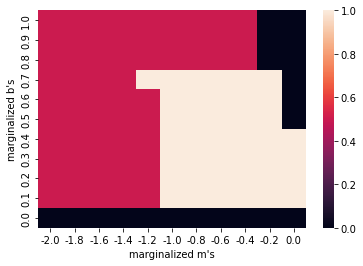

In [220]:
#for coord in coords1:
#    coord2d = np.unravel_index(coord, piv.shape)
area1, coords1 = find_confidence_interval2d(piv, 68)
area1a, coords1a = find_confidence_interval2d(piv, 95)

piv_array = np.array(piv).flatten()
for i in range(121):
    if i in coords1:
        piv_array[i] = 1
    elif i in coords1a:
        piv_array[i] = 0.5
    else:
        piv_array[i] = 0
        
ax = sns.heatmap(piv_array.reshape(11,11), xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
plt.gca().invert_yaxis()
plt.ylabel("marginalized b's")
plt.xlabel("marginalized m's")
plt.show()

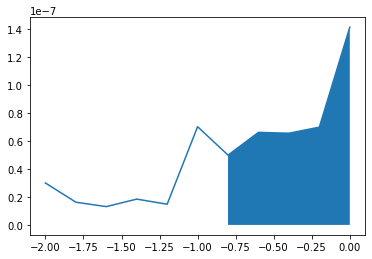

In [147]:
def find_confidence_interval(array, percentile):
    #### manually find peak and then creep outward until I've taken over blah% area under the marginalized posterior
    
    # stopping criterion
    stop = 0.01*percentile*np.sum(array) 
    
    # initialize at peak likelihood
    area = 0
    arg = np.argmax(array)
    peak_arg = arg # save this off for function return
    area += array[arg]
    
    # probe step to the left and right
    # this strategy is based on looking at the shape of the posteriors
    # otherwise I'd be more worried about falling into local extrema
    left = arg-1
    right = arg+1
    try: 
        left_val = array[left]
    except:
        left_val = 0
    try:
        right_val = array[right]
    except:
        right_val = 0
        
    # if both left and right steps are successful, take the higher value 
    if left_val > right_val:
        direction = "left"
    else:
        direction = "right"
        
    while area < stop:            
        if direction == "left":
            arg -= 1
        elif direction == "right":
            arg += 1
            
        # update total area
        area += array[arg]
    
    return area, arg, peak_arg

"""
# Test
area, arg, peak_arg = find_confidence_interval(b_vs_m, 68)
plt.plot(piv.columns, b_vs_m)
plt.fill_between(piv.columns[arg: peak_arg+1], b_vs_m[arg: peak_arg+1])
plt.show()
"""

In [238]:
"""
print(np.sum(m_vs_b)*0.68)
print(m_vs_b)
print(1.86277042e-65+2.82332594e-07 + 1.74835507e-08 + 3.56631395e-08+ 5.21628632e-08)
"""

3.772991840648621e-07
[1.86277042e-65 2.82332594e-07 1.74835507e-08 3.56631395e-08
 5.21628632e-08 4.95456718e-08 1.35929480e-08 6.06243550e-08
 1.72236554e-09 3.99864676e-08 1.73778602e-09]
3.876421474e-07


5.548517412718562e-07
5.54851741271856e-07
4.7330619192148343e-07
6.814233840713897e-07
4.6931573097920216e-07
5.539828482627192e-07
0.7069993357146981 6 10


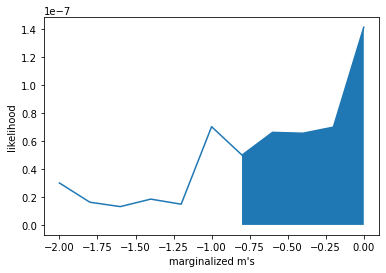

0.6986409492279123 4 1


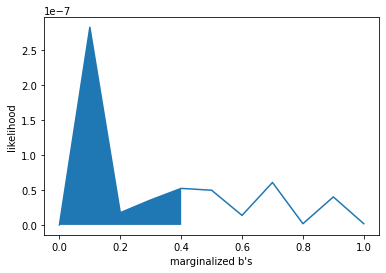

In [146]:
from numpy import trapz

b_vs_m = np.zeros(len(piv))
m_vs_b = np.zeros(len(piv.T))

for i, j in enumerate(piv.T):
    m_vs_b[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    # if m==0, multiply the single collapsed m from all the redundant cutoffs by 11
    #if j==0:
    #    piv[j] = 11*piv[j]
    b_vs_m[i] = np.nansum(piv[j])
    
print(np.sum(b_vs_m))
print(np.sum(m_vs_b))

print(simps(b_vs_m, dx=1))
print(simps(m_vs_b, dx=1))
print(trapz(b_vs_m, dx=1))
print(trapz(m_vs_b, dx=1))

area, arg, peak_arg = find_confidence_interval(b_vs_m, 68)
print(area/np.sum(b_vs_m), arg, peak_arg)
plt.plot(piv.columns, b_vs_m)
plt.fill_between(piv.columns[arg: peak_arg+1], b_vs_m[arg: peak_arg+1])
plt.xlabel("marginalized m's")
plt.ylabel('likelihood')
#plt.savefig('marginalized_m.pdf', format='pdf')
plt.show()

area, arg, peak_arg = find_confidence_interval(m_vs_b, 68)
print(area/np.sum(m_vs_b), arg, peak_arg)
plt.plot(piv.T.columns, m_vs_b)
plt.fill_between(piv.T.columns[peak_arg-1: arg+1], m_vs_b[peak_arg-1: arg+1])
plt.xlabel("marginalized b's")
plt.ylabel('likelihood')
plt.show()

3.9611734523002964e-67 3.3486109495561355e-08 5.548517412718562e-07


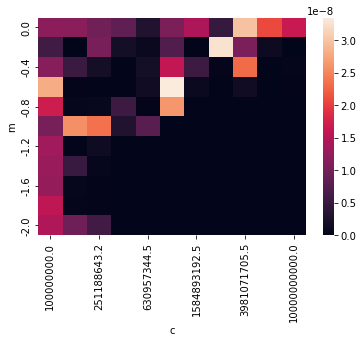

In [221]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','c']).sum('normalized_likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv.pivot("m", "c","normalized_likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=df.c.unique().round(1), yticklabels=df.m.unique().round(1))
#cbar = plt.colorbar(piv)
#ax = sns.heatmap(np.log10(piv), xticklabels=df.fixed_c.unique().round(1), yticklabels=df.m.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
#cbar.ax.set_ylabel('likelihood')
plt.show()

In [120]:
piv

c,1.000000e+08,1.584893e+08,2.511886e+08,3.981072e+08,6.309573e+08,1.000000e+09,1.584893e+09,2.511886e+09,3.981072e+09,6.309573e+09,1.000000e+10
m,,,,,,,,,,,
-2.0,1.459665e-08,9.534398e-09,5.815835e-09,2.169927e-66,2.640842e-66,2.050758e-66,2.797416e-66,3.927772e-66,2.633050e-66,2.149484e-66,1.454271e-66
-1.8,1.569679e-08,3.373463e-10,1.740221e-10,1.651976e-66,2.108177e-66,5.061704e-66,2.241167e-66,1.523889e-66,3.579408e-66,2.639339e-66,2.433586e-66
-1.6,1.247788e-08,4.250712e-10,1.681028e-10,2.582810e-17,3.690191e-66,4.026080e-66,1.755011e-66,1.332834e-66,4.388945e-66,1.574116e-66,1.557043e-66
-1.4,1.285773e-08,5.030448e-09,5.162689e-10,1.783500e-11,1.912815e-66,7.697331e-66,2.103042e-66,2.454423e-66,8.646506e-67,2.011200e-66,1.797243e-66
-1.2,1.342461e-08,4.440116e-11,1.248100e-09,7.270332e-11,3.412250e-18,3.961173e-67,7.716815e-67,1.840449e-66,8.631612e-67,1.613308e-66,1.817440e-66
-1.0,1.013415e-08,2.569621e-08,2.350775e-08,2.991946e-09,7.803676e-09,1.144330e-66,1.340096e-66,8.988962e-67,7.196483e-67,1.245043e-66,6.066934e-67
-0.8,1.698184e-08,4.097105e-10,6.505744e-10,5.402434e-09,1.433713e-10,2.623555e-08,1.321575e-14,1.622711e-44,1.291655e-43,4.671008e-44,1.181429e-49
-0.6,2.800430e-08,2.147224e-10,5.087867e-11,9.919108e-11,1.536118e-09,3.348611e-08,8.322097e-10,1.290256e-10,1.488326e-09,4.344408e-11,1.890097e-10
-0.4,1.130266e-08,5.190129e-09,1.732231e-09,2.296191e-11,1.773509e-09,1.606050e-08,5.406210e-09,3.130068e-10,2.315056e-08,1.163260e-10,3.837037e-10


In [115]:
print(np.sum(piv[1.000000e+08]))
print(np.sum(piv[1.000000e+10]))
print("")
print(np.median(piv[1.000000e+08]))
print(np.nanmedian(piv[1.000000e+10]))

1.5402961252439307e-07
5.804805844089947e-10

1.285772908362856e-08
2.1255131973400397e-66


4.2655616077508133e-07
4.265561607750814e-07
0.8212935864753819 5 0


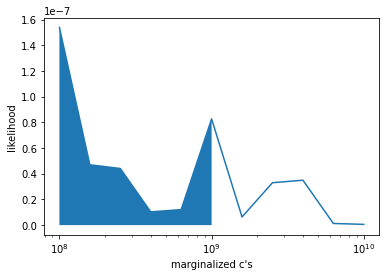

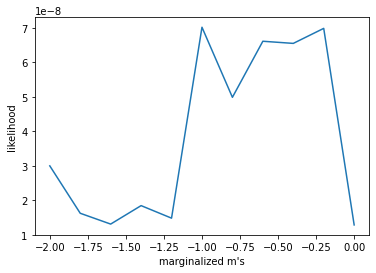

In [118]:
m_vs_c = np.zeros(len(piv))
c_vs_m = np.zeros(len(piv.T))

for i, j in enumerate(piv.T):
    #if j==0: # if m==0 and I collapsed cutoffs down to it, multiply likelihood by 11 so it's not undercounted
        #piv.T[j] = 11*piv.T[j]
        #print(j)
    c_vs_m[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    m_vs_c[i] = np.nansum(piv[j])
    
print(np.sum(m_vs_c))
print(np.sum(c_vs_m))

#plt.plot(piv.columns, np.log10(m_vs_c))
area, arg, peak_arg = find_confidence_interval(m_vs_c, 68)
print(area/np.sum(m_vs_c), arg, peak_arg)
plt.plot(piv.columns, m_vs_c)
plt.fill_between(piv.columns[peak_arg: arg+1], m_vs_c[peak_arg: arg+1])
plt.xscale('log')
plt.xlabel("marginalized c's")
plt.ylabel('likelihood')
#plt.savefig('marginalized_m.pdf', format='pdf')
plt.show()

plt.plot(piv.T.columns, c_vs_m)
plt.xlabel("marginalized m's")
plt.ylabel('likelihood')
plt.show()

(7, 5)
stop:  3.7729918406486226e-07
(7, 5)
stop:  5.271091542082634e-07
3.8601496576732223e-07


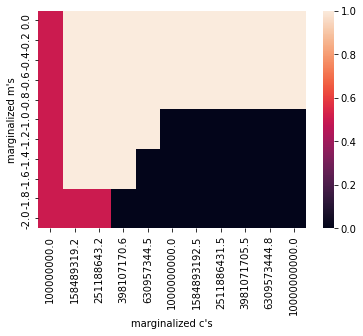

In [222]:
area2, coords2 = find_confidence_interval2d(piv, 68)
area2a, coords2a = find_confidence_interval2d(piv, 95)
print(area2)
piv_array = np.array(piv).flatten()
for i in range(121):
    if i in coords2:
        piv_array[i] = 1
    elif i in coords2a:
        piv_array[i] = 0.5
    else:
        piv_array[i] = 0
        
ax = sns.heatmap(piv_array.reshape(11,11), xticklabels=df.c.unique().round(1), yticklabels=df.m.unique().round(1))
plt.gca().invert_yaxis()
plt.ylabel("marginalized m's")
plt.xlabel("marginalized c's")
plt.show()

In [99]:
piv

c,1.000000e+08,1.584893e+08,2.511886e+08,3.981072e+08,6.309573e+08,1.000000e+09,1.584893e+09,2.511886e+09,3.981072e+09,6.309573e+09,1.000000e+10
b,,,,,,,,,,,
0.0,3.591837e-66,1.866438e-66,2.347861e-66,6.837510e-67,1.641188e-66,1.820292e-66,1.218238e-66,9.151732e-67,5.216165e-67,1.135427e-66,2.885883e-66
0.1,1.529748e-07,1.164808e-08,9.720843e-09,8.325369e-09,2.908291e-09,1.053787e-08,1.425806e-08,4.808186e-09,2.985148e-08,2.073306e-08,1.656652e-08
0.2,3.354629e-13,5.494234e-09,1.026484e-08,1.724090e-09,6.269709e-15,2.904621e-14,4.306583e-15,7.484802e-15,3.478621e-15,2.100585e-15,2.573402e-15
0.3,3.518189e-27,2.610803e-08,1.733827e-09,3.027691e-12,8.476500e-10,6.969773e-09,8.331048e-13,4.765094e-22,4.814075e-31,1.920430e-29,1.054773e-28
0.4,4.519863e-46,5.499173e-09,6.970385e-10,2.108125e-11,1.772759e-09,1.024496e-14,9.822178e-11,3.259768e-08,1.034756e-08,1.123801e-09,5.542891e-12
0.5,7.512300e-69,9.871820e-09,2.351056e-08,9.919108e-11,7.504940e-13,1.606049e-08,4.037683e-22,2.553968e-17,3.285775e-14,5.973328e-13,2.224341e-12
0.6,9.964614e-90,8.303546e-15,1.248104e-09,5.402434e-09,1.536118e-09,7.792877e-15,5.406210e-09,6.571323e-14,4.887505e-27,1.552481e-25,3.044388e-23
0.7,4.050924e-119,1.808122e-29,5.173859e-10,2.991940e-09,4.948727e-12,3.348606e-08,8.842149e-18,3.129411e-10,2.315049e-08,4.741563e-11,1.131776e-10
0.8,7.494314e-141,2.973900e-48,3.400298e-10,7.218796e-11,1.384226e-10,5.305961e-14,8.321674e-10,3.817102e-21,6.826836e-14,6.891033e-11,2.705261e-10


In [105]:
print(np.sum(piv[1.000000e+08]))
print(np.sum(piv[1.000000e+10]))
print("")
print(np.median(piv[1.000000e+08]))
print(np.median(piv[1.000000e+10]))

1.5297517387375543e-07
1.7147003021017944e-08

7.512299635039991e-69
2.224340511118862e-12


In [103]:
b_vs_c

array([1.52975174e-07, 5.86213436e-08, 5.38494420e-08, 1.86576769e-08,
       1.50126221e-08, 9.32898391e-08, 2.05955482e-08, 3.78479061e-08,
       6.48379574e-08, 2.20172289e-08, 1.71470030e-08])

In [94]:
np.nanmedian(df.loc[(df.b==0.1)&(df.c==1e10)].normalized_logL)

-158.07403575391197

9.447367359029268e-199 1.529748384108808e-07 5.548517412718563e-07


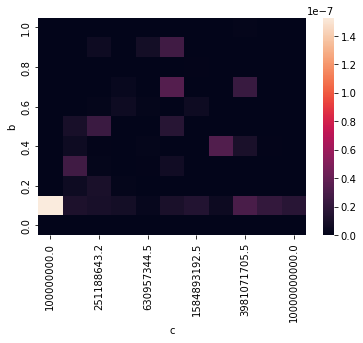

In [223]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index().groupby(['b','c']).sum('normalized_likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv.pivot("b", "c","normalized_likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=df.fixed_c.unique().round(1), yticklabels=df.b.unique().round(1))
#ax = sns.heatmap(np.log10(piv), xticklabels=df.fixed_c.unique().round(1), yticklabels=df.b.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.show()

5.548517412718563e-07
5.548517412718562e-07


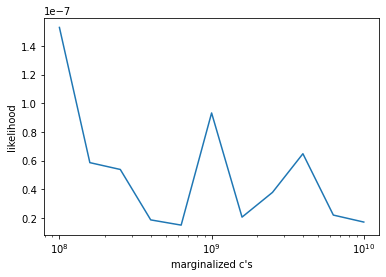

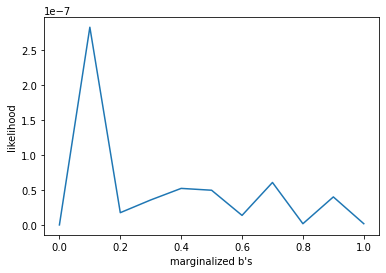

In [102]:
b_vs_c = np.zeros(len(piv))
c_vs_b = np.zeros(len(piv.T))

for i, j in enumerate(piv.T):
    c_vs_b[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    b_vs_c[i] = np.nansum(piv[j])
    
print(np.sum(b_vs_c))
print(np.sum(c_vs_b))

#plt.plot(piv.columns, np.log10(m_vs_c))
plt.plot(piv.columns, b_vs_c)
plt.xscale('log')
plt.xlabel("marginalized c's")
plt.ylabel('likelihood')
#plt.savefig('marginalized_m.pdf', format='pdf')
plt.show()

plt.plot(piv.T.columns, c_vs_b)
plt.xlabel("marginalized b's")
plt.ylabel('likelihood')
plt.show()

In [158]:
coords3a

[11, 12, 22, 11, 12, 22, 11, 12, 22, 11, 12, 22]

(1, 0)
stop:  3.772991840648623e-07
(1, 0)
stop:  5.271091542082636e-07
4.108460779930367e-07 5.377047382508383e-07


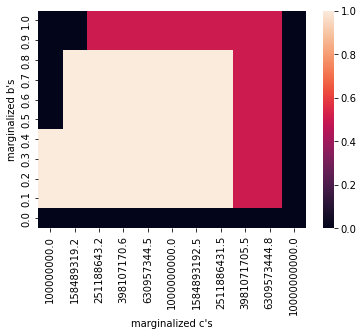

In [224]:
area3, coords3 = find_confidence_interval2d(piv, 68)
area3a, coords3a = find_confidence_interval2d(piv, 95)
print(area3, area3a)
piv_array = np.array(piv).flatten()
for i in range(121):
    if i in coords3:
        piv_array[i] = 1
    elif i in coords3a:
        piv_array[i] = 0.5
    else:
        piv_array[i] = 0
        
ax = sns.heatmap(piv_array.reshape(11,11), xticklabels=df.c.unique().round(1), yticklabels=df.b.unique().round(1))
plt.gca().invert_yaxis()
plt.ylabel("marginalized b's")
plt.xlabel("marginalized c's")
plt.show()

3.9611734523002964e-67 3.3486109495561355e-08 4.265561607750814e-07 -8140.916924628797 -14.667521800430082
-152.89666092289218 -17.212135126026666


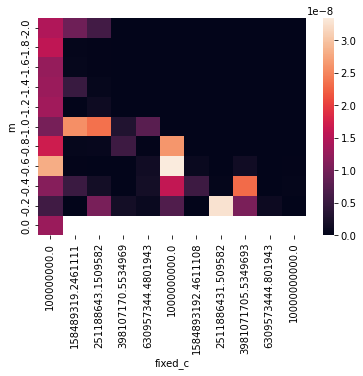

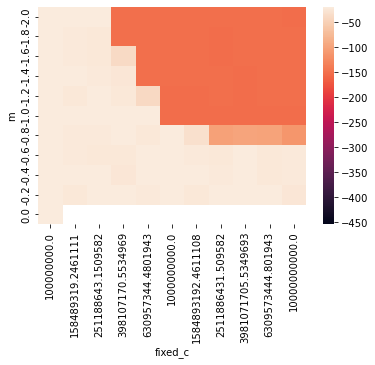

In [84]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
#piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("m", "fixed_c","normalized_likelihood") # vs logged_normalized_likelihood
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))

sns.heatmap(piv, yticklabels=df.m.unique().round(1))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.show()

sns.heatmap(np.log(piv), vmin=-454, vmax=-19, yticklabels=df.m.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness

fig.tight_layout()
#plt.savefig('marginalize_b_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

For email to Sarah M, show that model with c=1e10 doesn't match observed multiplicity

In [83]:
print(np.nanmedian(df.loc[df.c == 1e10].normalized_likelihood))
print(np.nanmedian(df.loc[df.c == 1e9].normalized_likelihood))
print(np.nanmedian(df.loc[df.c == 1e8].normalized_likelihood))
print("")
print(np.nanmedian(df.loc[df.c == 1e10].normalized_logL))
print(np.nanmedian(df.loc[df.c == 1e9].normalized_logL))
print(np.nanmedian(df.loc[df.c == 1e8].normalized_logL))

2.509774436636861e-69
2.1624006287631188e-69
7.216587795637056e-71

-157.95820252497856
-158.10715240983814
-161.5071593658676


In [69]:
df.iloc[26000].normalized_transit_multiplicity

[938.6338372610049, 86.3661627389951, 0.0, 0.0, 0.0, 0.0]

In [51]:
c_10gyrs

array([[         nan,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,          nan,          nan,          nan,
                 nan,          nan],
       [         nan,          nan,          nan,          nan,
                 nan,          nan],
       ...,
       [386.89306358, 254.32442197, 186.48482659, 120.86705202,
         63.69219653,  12.73843931],
       [376.5275762 , 264.20899855, 183.87518142, 126.00507983,
         60.84542816,  13.53773585],
       [375.16729706, 254.98254292, 191.01323829, 132.113762  ,
         60.68882747,  11.03433227]])

In [75]:
print(np.nanmin(c_10gyrs, axis=0))
print(np.nanmean(c_10gyrs, axis=0))
print(np.nanmedian(c_10gyrs, axis=0))
print(np.nanmax(c_10gyrs, axis=0))
print("")
print(np.nanmin(c_9gyrs, axis=0))
print(np.nanmean(c_9gyrs, axis=0))
print(np.nanmedian(c_9gyrs, axis=0))
print(np.nanmax(c_9gyrs, axis=0))
print("")
print(np.nanmin(c_8gyrs, axis=0))
print(np.nanmean(c_8gyrs, axis=0))
print(np.nanmedian(c_8gyrs, axis=0))
print(np.nanmax(c_8gyrs, axis=0))

[375.16729706  76.94431921   0.           0.           0.
   0.        ]
[875.11400572 107.42231148  20.30197199  14.01675144   6.73436765
   1.41059172]
[932.47627843  92.2157148    0.           0.           0.
   0.        ]
[948.05568079 264.20899855 191.01323829 132.113762    63.69219653
  13.53773585]

[375.15        75.85903084   0.           0.           0.
   0.        ]
[849.43299658 115.09020259  29.08624552  20.00002676   9.41621016
   1.97431839]
[931.64887577  93.33104553   0.           0.           0.
   0.        ]
[949.14096916 258.54673496 188.16071429 138.375       62.55868545
  15.28973035]

[364.6239255  79.1695147   0.          0.          0.          0.       ]
[637.24490539 176.75756496 101.51834429  69.68237216  32.99023268
   6.80658052]
[642.65728034 176.84318862 102.62967649  72.40199704  34.53405018
   6.75866616]
[945.8304853  261.63663664 200.03960824 137.93537709  67.97429707
  16.08711303]


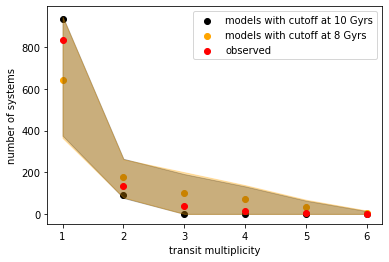

In [80]:
# for email to Sarah M, show that model with c=1e10 doesn't match observed multiplicity
df.loc[df.c == 1e10]
c_10gyrs = np.array([np.array(x) for x in df.loc[df.c == 1e10].normalized_transit_multiplicity])
c_9gyrs = np.array([np.array(x) for x in df.loc[df.c == 1e9].normalized_transit_multiplicity])
c_8gyrs = np.array([np.array(x) for x in df.loc[df.c == 1e8].normalized_transit_multiplicity])

plt.scatter(np.arange(7)[1:], np.nanmedian(c_10gyrs, axis=0), color='k', label='models with cutoff at 10 Gyrs')
plt.scatter(np.arange(7)[1:], np.nanmedian(c_8gyrs, axis=0), color='orange', label='models with cutoff at 8 Gyrs')
plt.fill_between(np.arange(7)[1:], np.nanmin(c_10gyrs, axis=0), np.nanmax(c_10gyrs, axis=0), alpha=0.3, color='k')
#plt.fill_between(np.arange(7)[1:], np.nanmin(c_9gyrs, axis=0), np.nanmax(c_9gyrs, axis=0), alpha=0.3, color='pink')
plt.fill_between(np.arange(7)[1:], np.nanmin(c_8gyrs, axis=0), np.nanmax(c_8gyrs, axis=0), alpha=0.3, color='orange')

plt.scatter(np.arange(7)[1:], k, c='r', label='observed')
plt.xlabel('transit multiplicity')
plt.ylabel('number of systems')
plt.legend()
plt.show()

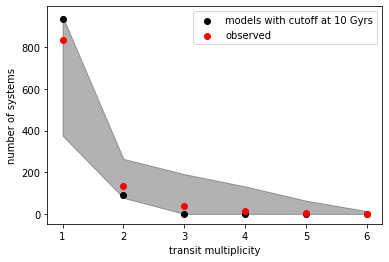

In [95]:
# for email to Sarah M, show that model with c=1e10 doesn't match observed multiplicity
df.loc[df.c == 1e10]
c_10gyrs = np.array([np.array(x) for x in df.loc[df.c == 1e10].normalized_transit_multiplicity])
c_9gyrs = np.array([np.array(x) for x in df.loc[df.c == 1e9].normalized_transit_multiplicity])
c_8gyrs = np.array([np.array(x) for x in df.loc[df.c == 1e8].normalized_transit_multiplicity])

plt.scatter(np.arange(7)[1:], np.nanmedian(c_10gyrs, axis=0), color='k', label='models with cutoff at 10 Gyrs')
plt.fill_between(np.arange(7)[1:], np.nanmin(c_10gyrs, axis=0), np.nanmax(c_10gyrs, axis=0), alpha=0.3, color='k')

plt.scatter(np.arange(7)[1:], k, c='r', label='observed')
plt.xlabel('transit multiplicity')
plt.ylabel('number of systems')
plt.legend()
plt.show()

In [49]:
# tossed out models
print(len(df_not_keep.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index()))

# surviving models
print(len(df_keep.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index()))

# total models, if we count one model per 4-d sub-cube
print(len(df.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index()))

12188
1370
13398


3.9611734523002964e-67 1.2366745155002282e-21 5.301605137839221e-21 -11248.610184319547 -46.68627732197248
-152.89666092289218 -48.14186101817818
fixed_c  1.000000e+08  1.584893e+08  2.511886e+08  3.981072e+08  6.309573e+08  \
m                                                                               
-2.0     1.166550e-27  1.808122e-29  5.977640e-67  2.169927e-66  2.640842e-66   
-1.8     5.743621e-31  5.179953e-22  7.619785e-28  1.651976e-66  2.108177e-66   
-1.6     8.059513e-29  1.911014e-27  2.244146e-24  5.758328e-67  3.690191e-66   
-1.4     5.529566e-30  9.564162e-30  4.395121e-22  4.720924e-67  1.912815e-66   
-1.2     3.667036e-30  1.333952e-23  7.842029e-30  8.504785e-27  2.785278e-22   
-1.0     2.657251e-29  3.209955e-30  6.262147e-29  6.351093e-30  1.424059e-66   
-0.8     8.071033e-31  3.048920e-22  2.804649e-27  2.938956e-30  6.703612e-25   
-0.6     1.515909e-27  2.090995e-27  7.346388e-24  1.236675e-21  2.358393e-32   
-0.4     4.650165e-29  8.437498e-29  5.34973

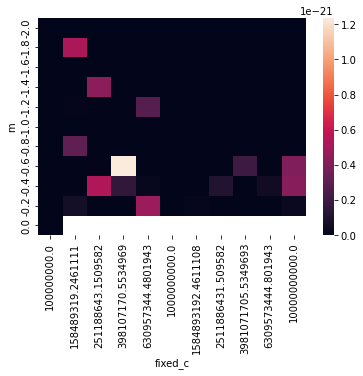

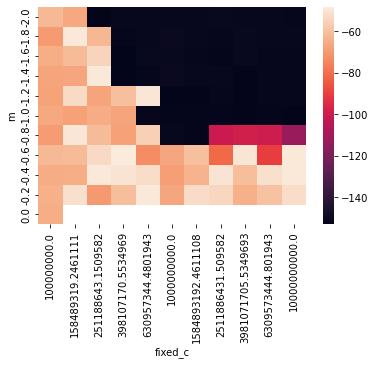

In [50]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv = df_not_keep.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("m", "fixed_c","normalized_likelihood") # vs logged_normalized_likelihood
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))
print(piv)

sns.heatmap(piv, yticklabels=df.m.unique().round(1))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.show()

sns.heatmap(np.log(piv), yticklabels=df.m.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness

fig.tight_layout()
#plt.savefig('marginalize_b_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

5.411026920763152e-197 1.540292797454443e-07 4.2655616077508144e-07 -8785.089009043648 -14.667521800430082
-451.9208244259869 -15.68612312438769


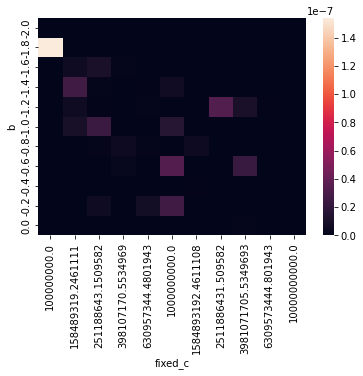

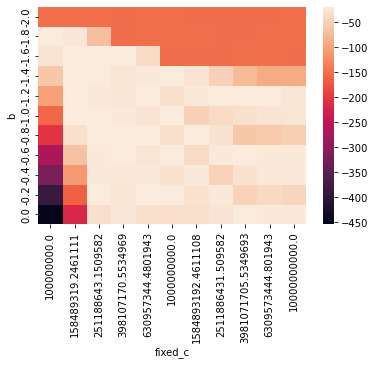

In [52]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['b','fixed_c']).sum('normalized_likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("b", "fixed_c","normalized_likelihood") # vs logged_normalized_likelihood
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))

sns.heatmap(piv, yticklabels=df.m.unique().round(1))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.show()

sns.heatmap(np.log(piv), vmin=-454, vmax=-19, yticklabels=df.m.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness

fig.tight_layout()
#plt.savefig('marginalize_b_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

fixed_c   1.000000e+08  1.584893e+08  2.511886e+08  3.981072e+08  \
b                                                                  
0.0       3.640461e-66  1.751538e-66  2.174370e-66  6.074367e-67   
0.1       1.540293e-07  7.865642e-12  4.439199e-31  1.332584e-66   
0.2       3.327789e-13  5.494216e-09  1.026479e-08  1.724083e-09   
0.3       3.137266e-27  2.610803e-08  1.733827e-09  3.027691e-12   
0.4       1.478920e-45  5.499173e-09  6.970385e-10  2.108125e-11   
0.5       9.166578e-69  9.871820e-09  2.351056e-08  9.919108e-11   
0.6       9.977837e-90  8.303546e-15  1.248104e-09  5.402434e-09   
0.7      2.547378e-117  1.808122e-29  5.173859e-10  2.991940e-09   
0.8      3.902307e-140  2.973900e-48  3.400298e-10  7.218796e-11   
0.9      1.743296e-169  9.162665e-72  5.816809e-09  1.622219e-12   
1.0      5.411027e-197  2.490133e-95  3.452870e-15  1.673354e-11   

fixed_c  6.309573e+08  1.000000e+09  1.584893e+09  2.511886e+09  3.981072e+09  \
b                                 

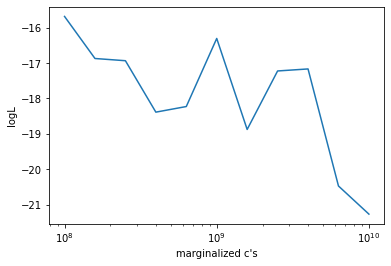

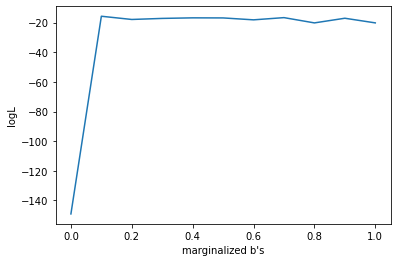

In [53]:
b_vs_c = np.zeros(len(piv))
c_vs_b = np.zeros(len(piv.T))
print(piv)
for i, j in enumerate(piv.T):
    b_vs_c[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    #print(np.nansum(piv[j]))
    c_vs_b[i] = np.nansum(piv[j])
    
plt.plot(piv.columns, np.log(c_vs_b))
plt.xlabel("marginalized c's")
plt.ylabel('logL')
plt.xscale('log')
#plt.savefig('marginalized_c.pdf', format='pdf')
plt.show()

plt.plot(piv.T.columns, np.log(b_vs_c))
plt.xlabel("marginalized b's")
plt.ylabel('logL')
#plt.savefig('marginalized_b.pdf', format='pdf')
plt.show()

1.627197E+11
3.639792327355922e-21 5.147125917874067e-10 7.517511392440223e-10 -1811.5173414549984 -21.008615778605094
-47.06236032577809 -21.38741244524539
fixed_c  1.000000e+08  1.584893e+08  2.511886e+08  3.981072e+08  6.309573e+08  \
m                                                                               
-2.0     8.104956e-16  9.664517e-16  8.802068e-17           NaN           NaN   
-1.8     1.479928e-14  6.168556e-11  9.722078e-14           NaN           NaN   
-1.6     4.721801e-16  1.290496e-14  2.000970e-11           NaN           NaN   
-1.4     2.223373e-16  2.382507e-18           NaN           NaN           NaN   
-1.2     1.970530e-16           NaN  2.845217e-19  1.397085e-13           NaN   
-1.0     1.860507e-15  5.894846e-17  4.280899e-16  5.372433e-16  3.015051e-15   
-0.8     1.093218e-16  3.639792e-21  2.771495e-14  1.621180e-19           NaN   
-0.6     1.972640e-16  3.944078e-13  2.521905e-12  4.324402e-21  2.885008e-19   
-0.4     1.820487e-15  5.147126e-

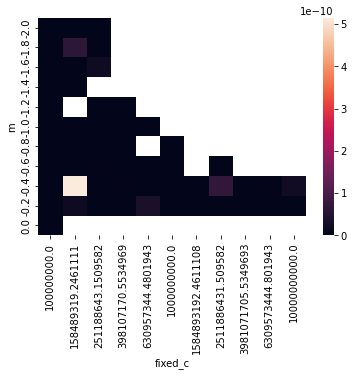

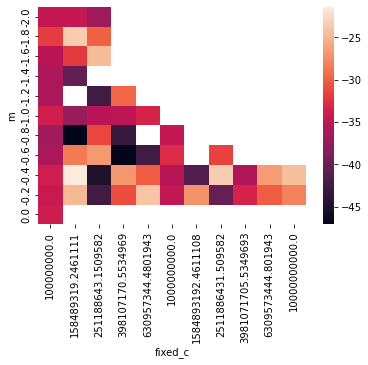

In [188]:
%matplotlib inline
from decimal import Decimal

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv = df_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv_temp = df_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c','b','f']).sum('normalized_likelihood').reset_index()
print('%E' % Decimal(str(np.nansum(piv_temp.values))))

#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("m", "fixed_c","normalized_likelihood") # vs logged_normalized_likelihood
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))
print(piv)

sns.heatmap(piv, yticklabels=df.m.unique().round(1))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.show()

sns.heatmap(np.log(piv), yticklabels=df.m.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness

fig.tight_layout()
#plt.savefig('marginalize_b_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

3.975522E+12
5.118235745272305e-18 3.34861041896008e-08 4.265393558095031e-07 -1371.3821287013607 -14.667561198047943
-39.81372187522459 -17.21213528447926
fixed_c  1.000000e+08  1.584893e+08  2.511886e+08  3.981072e+08  6.309573e+08  \
m                                                                               
-2.0     1.459665e-08  9.534398e-09  5.815835e-09           NaN           NaN   
-1.8     1.569677e-08  3.233709e-10  1.740233e-10           NaN           NaN   
-1.6     1.247788e-08  4.250689e-10  1.614806e-10  2.582810e-17           NaN   
-1.4     1.285775e-08  5.030448e-09  5.162689e-10  1.783500e-11           NaN   
-1.2     1.342461e-08  4.440116e-11  1.248100e-09  7.265950e-11  5.118236e-18   
-1.0     1.013415e-08  2.569622e-08  2.350775e-08  2.991945e-09  7.803673e-09   
-0.8     1.698185e-08  4.097105e-10  6.510827e-10  5.402434e-09  1.433713e-10   
-0.6     2.800430e-08  2.145972e-10  5.569144e-11  9.919108e-11  1.536118e-09   
-0.4     1.130266e-08  5.190607e-0

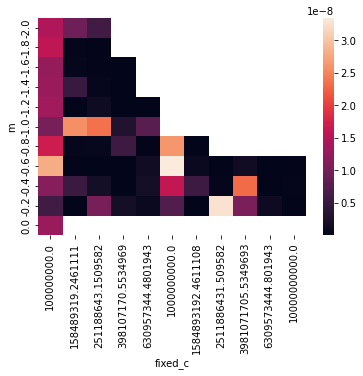

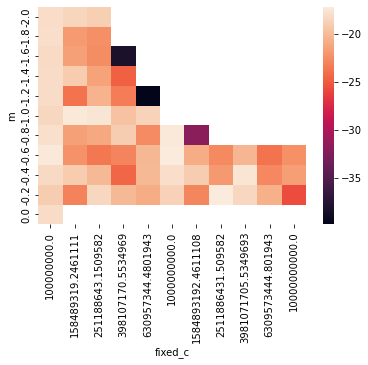

In [189]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv = df_not_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv_temp = df_not_keep2.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c','f','b']).sum('normalized_likelihood').reset_index()
print('%E' % Decimal(str(np.nansum(piv_temp.values))))

#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("m", "fixed_c","normalized_likelihood") # vs logged_normalized_likelihood
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))
print(piv)

sns.heatmap(piv, yticklabels=df.m.unique().round(1))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.show()

sns.heatmap(np.log(piv), yticklabels=df.m.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness

fig.tight_layout()
#plt.savefig('marginalize_b_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

3.998530E+11
5.118235745272323e-19 3.3486109495578488e-09 4.265561608148746e-08 -1521.0568123193075 -16.97010689333084
-42.11630696821862 -19.514720219020198
fixed_c  1.000000e+08  1.584893e+08  2.511886e+08  3.981072e+08  6.309573e+08  \
m                                                                               
-2.0     1.459665e-09  9.534398e-10  5.815835e-10           NaN           NaN   
-1.8     1.569679e-09  3.373463e-11  1.740221e-11           NaN           NaN   
-1.6     1.247788e-09  4.250712e-11  1.681028e-11  2.582810e-18           NaN   
-1.4     1.285773e-09  5.030448e-10  5.162689e-11  1.783500e-12           NaN   
-1.2     1.342461e-09  4.440116e-12  1.248100e-10  7.270332e-12  5.118236e-19   
-1.0     1.013415e-09  2.569621e-09  2.350775e-09  2.991946e-10  7.803676e-10   
-0.8     1.698184e-09  4.097105e-11  6.505744e-11  5.402434e-10  1.433713e-11   
-0.6     2.800430e-09  2.147224e-11  5.087867e-12  9.919108e-12  1.536118e-10   
-0.4     1.130266e-09  5.190129e

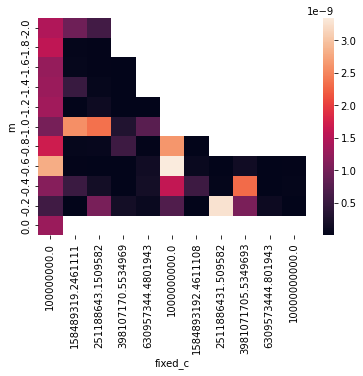

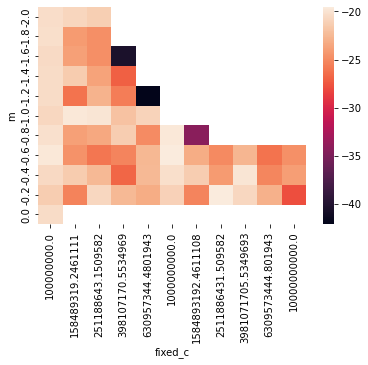

In [190]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv = df_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv_temp = df_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c','b','f']).sum('normalized_likelihood').reset_index()
print('%E' % Decimal(str(np.nansum(piv_temp.values))))

#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("m", "fixed_c","normalized_likelihood") # vs logged_normalized_likelihood
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))
print(piv)

sns.heatmap(piv, yticklabels=df.m.unique().round(1))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.show()

sns.heatmap(np.log(piv), yticklabels=df.m.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness

fig.tight_layout()
#plt.savefig('marginalize_b_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

3.598640E+12
4.606412170745073e-18 3.01374985460035e-08 3.839005447333604e-07 -1378.2372147924546 -14.77288231599469
-39.91908239088241 -17.31749564168455
fixed_c  1.000000e+08  1.584893e+08  2.511886e+08  3.981072e+08  6.309573e+08  \
m                                                                               
-2.0     1.313698e-08  8.580959e-09  5.234251e-09           NaN           NaN   
-1.8     1.412711e-08  3.036117e-10  1.566199e-10           NaN           NaN   
-1.6     1.123009e-08  3.825640e-10  1.512926e-10  2.324529e-17           NaN   
-1.4     1.157196e-08  4.527403e-09  4.646420e-10  1.605150e-11           NaN   
-1.2     1.208215e-08  3.996104e-11  1.123290e-09  6.543298e-11  4.606412e-18   
-1.0     9.120738e-09  2.312659e-08  2.115698e-08  2.692751e-09  7.023309e-09   
-0.8     1.528366e-08  3.687394e-10  5.855170e-10  4.862190e-09  1.290342e-10   
-0.6     2.520387e-08  1.932502e-10  4.579080e-11  8.927198e-11  1.382506e-09   
-0.4     1.017240e-08  4.671116e-09

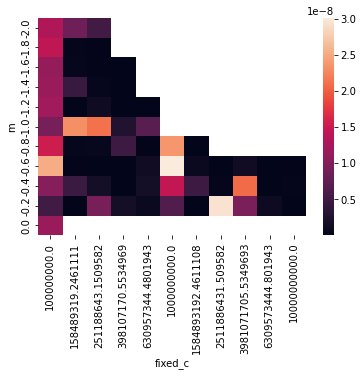

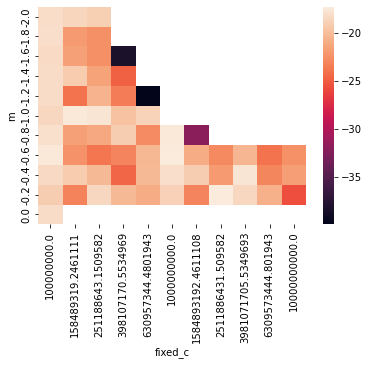

In [191]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv = df_not_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv_temp = df_not_keep3.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c','f','b']).sum('normalized_likelihood').reset_index()
print('%E' % Decimal(str(np.nansum(piv_temp.values))))

#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("m", "fixed_c","normalized_likelihood") # vs logged_normalized_likelihood
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))
print(piv)

sns.heatmap(piv, yticklabels=df.m.unique().round(1))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.show()

sns.heatmap(np.log(piv), yticklabels=df.m.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness

fig.tight_layout()
#plt.savefig('marginalize_b_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

1.627197E+11
3.639792327355922e-21 5.147125917874067e-10 7.517511392440223e-10 -1811.5173414549984 -21.008615778605094
-47.06236032577809 -21.38741244524539
fixed_c  1.000000e+08  1.584893e+08  2.511886e+08  3.981072e+08  6.309573e+08  \
m                                                                               
-2.0     8.104956e-16  9.664517e-16  8.802068e-17           NaN           NaN   
-1.8     1.479928e-14  6.168556e-11  9.722078e-14           NaN           NaN   
-1.6     4.721801e-16  1.290496e-14  2.000970e-11           NaN           NaN   
-1.4     2.223373e-16  2.382507e-18           NaN           NaN           NaN   
-1.2     1.970530e-16           NaN  2.845217e-19  1.397085e-13           NaN   
-1.0     1.860507e-15  5.894846e-17  4.280899e-16  5.372433e-16  3.015051e-15   
-0.8     1.093218e-16  3.639792e-21  2.771495e-14  1.621180e-19           NaN   
-0.6     1.972640e-16  3.944078e-13  2.521905e-12  4.324402e-21  2.885008e-19   
-0.4     1.820487e-15  5.147126e-

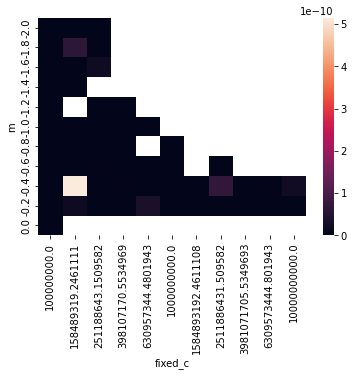

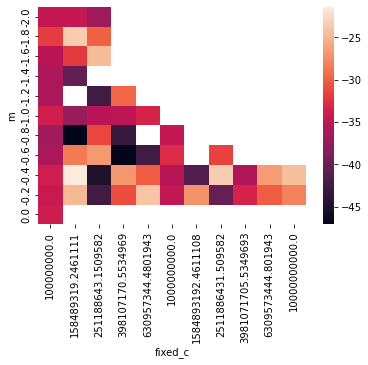

In [192]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv = df_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv_temp = df_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c','f','b']).sum('normalized_likelihood').reset_index()
print('%E' % Decimal(str(np.nansum(piv_temp.values))))

print(df_keep4.

#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("m", "fixed_c","normalized_likelihood") # vs logged_normalized_likelihood
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))
print(piv)

sns.heatmap(piv, yticklabels=df.m.unique().round(1))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.show()

sns.heatmap(np.log(piv), yticklabels=df.m.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness

fig.tight_layout()
#plt.savefig('marginalize_b_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

3.975522E+12
5.118235745272305e-18 3.34861041896008e-08 4.265393558095031e-07 -1371.3821287013607 -14.667561198047943
-39.81372187522459 -17.21213528447926
fixed_c  1.000000e+08  1.584893e+08  2.511886e+08  3.981072e+08  6.309573e+08  \
m                                                                               
-2.0     1.459665e-08  9.534398e-09  5.815835e-09           NaN           NaN   
-1.8     1.569677e-08  3.233709e-10  1.740233e-10           NaN           NaN   
-1.6     1.247788e-08  4.250689e-10  1.614806e-10  2.582810e-17           NaN   
-1.4     1.285775e-08  5.030448e-09  5.162689e-10  1.783500e-11           NaN   
-1.2     1.342461e-08  4.440116e-11  1.248100e-09  7.265950e-11  5.118236e-18   
-1.0     1.013415e-08  2.569622e-08  2.350775e-08  2.991945e-09  7.803673e-09   
-0.8     1.698185e-08  4.097105e-10  6.510827e-10  5.402434e-09  1.433713e-10   
-0.6     2.800430e-08  2.145972e-10  5.569144e-11  9.919108e-11  1.536118e-09   
-0.4     1.130266e-08  5.190607e-0

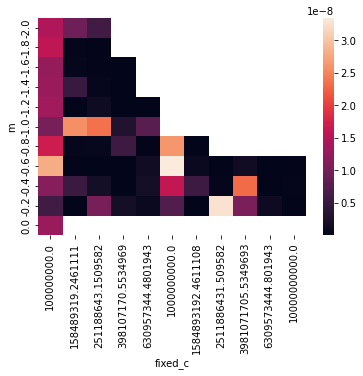

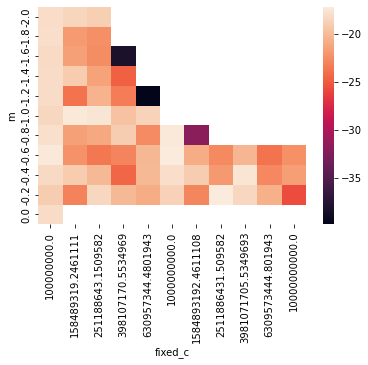

In [193]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv = df_not_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index()
piv_temp = df_not_keep4.groupby(['b','fixed_c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','fixed_c','f','b']).sum('normalized_likelihood').reset_index()
print('%E' % Decimal(str(np.nansum(piv_temp.values))))

#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv[piv['normalized_likelihood'] > 0] # ie. get rid of 0s that will turn into -inf when I log them
piv = piv.pivot("m", "fixed_c","normalized_likelihood") # vs logged_normalized_likelihood
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
print(np.nanmin(np.log(piv.values)), np.nanmax(np.log(piv.values)))
print(piv)

sns.heatmap(piv, yticklabels=df.m.unique().round(1))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.show()

sns.heatmap(np.log(piv), yticklabels=df.m.unique().round(1))
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness

fig.tight_layout()
#plt.savefig('marginalize_b_two_cuts.pdf', format='pdf', bbox_inches='tight')
plt.show()

fixed_c  1.000000e+08  1.584893e+08  2.511886e+08  3.981072e+08  6.309573e+08  \
m                                                                               
-2.0     1.459665e-09  9.534398e-10  5.815835e-10           NaN           NaN   
-1.8     1.569679e-09  3.373463e-11  1.740221e-11           NaN           NaN   
-1.6     1.247788e-09  4.250712e-11  1.681028e-11  2.582810e-18           NaN   
-1.4     1.285773e-09  5.030448e-10  5.162689e-11  1.783500e-12           NaN   
-1.2     1.342461e-09  4.440116e-12  1.248100e-10  7.270332e-12  5.118236e-19   
-1.0     1.013415e-09  2.569621e-09  2.350775e-09  2.991946e-10  7.803676e-10   
-0.8     1.698184e-09  4.097105e-11  6.505744e-11  5.402434e-10  1.433713e-11   
-0.6     2.800430e-09  2.147224e-11  5.087867e-12  9.919108e-12  1.536118e-10   
-0.4     1.130266e-09  5.190129e-10  1.732231e-10  2.296191e-12  1.773509e-10   
-0.2     5.723440e-10  9.867110e-12  1.026479e-09  1.725230e-10  8.476501e-11   
 0.0     1.282956e-09       

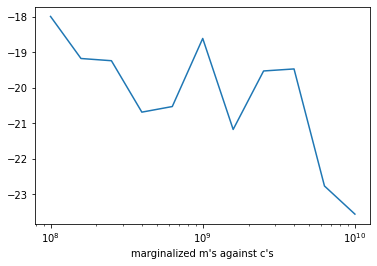

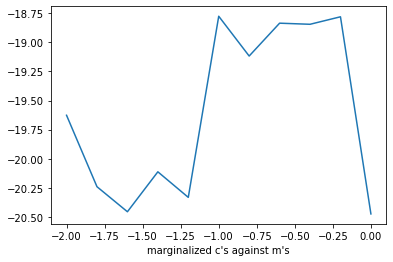

In [125]:
m_vs_c = np.zeros(len(piv))
c_vs_m = np.zeros(len(piv))
print(piv)
for i, j in enumerate(piv.T):
    m_vs_c[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    c_vs_m[i] = np.nansum(piv[j])
    
plt.plot(piv.columns, np.log(c_vs_m))
plt.xlabel("marginalized m's against c's")
plt.xscale('log')
plt.show()

plt.plot(piv.T.columns, np.log(m_vs_c))
plt.xlabel("marginalized c's against m's")
plt.show()

In [20]:
df.loc[(df.f == 0.2) &(df.c >9.5e9) &(np.round(df.b,1)==0.3)  ]

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_frac2,...,old45_transit_multiplicity,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL,normalized_likelihood,fixed_c,redundant
4739,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-160.969441,"[818.6, 76.60000000000001, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[437.0, 38.2]",-226.414898,"[424.0, 41.2]",-271.406338,"[394.6, 35.4]","[937.2933422698839, 87.70665773011618, 0.0, 0....",-159.836931,3.834448e-70,1.000000e+10,False
4740,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-158.477401,"[823.6, 80.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[434.8, 43.2]",-218.362575,"[434.0, 40.6]",-266.683537,"[389.6, 39.400000000000006]","[934.2518813634351, 90.74811863656485, 0.0, 0....",-157.976311,2.464677e-69,1.000000e+10,False
4741,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-160.999596,"[805.8000000000001, 77.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[443.20000000000005, 38.0]",-242.547547,"[405.8, 42.2]",-267.174895,"[400.0, 34.800000000000004]","[935.5969642048029, 89.4030357951971, 0.0, 0.0...",-158.778903,1.104584e-69,1.000000e+10,False
4742,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-161.873629,"[812.0, 75.60000000000001, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[436.6, 36.4]",-230.493987,"[414.20000000000005, 43.800000000000004]",-278.649288,"[397.8, 31.8]","[937.6971608832807, 87.30283911671924, 0.0, 0....",-160.096510,2.957803e-70,1.000000e+10,False
4743,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-163.801782,"[811.8000000000001, 73.2, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[450.6, 41.0]",-253.186835,"[407.0, 37.2]",-258.695588,"[404.8, 36.0]","[940.2203389830509, 84.77966101694915, 0.0, 0....",-161.787924,5.450010e-71,1.000000e+10,False
4744,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-157.840005,"[809.4000000000001, 81.4, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[434.8, 45.0]",-231.946168,"[418.8, 41.0]",-263.189614,"[390.6, 40.400000000000006]","[931.3370004490347, 93.66299955096542, 0.0, 0....",-156.342872,1.262274e-68,1.000000e+10,False
4745,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-162.564889,"[809.6, 74.8, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[459.40000000000003, 39.6]",-251.643830,"[400.20000000000005, 40.800000000000004]",-259.542286,"[409.40000000000003, 34.0]","[938.3084577114428, 86.6915422885572, 0.0, 0.0...",-160.495215,1.985243e-70,1.000000e+10,False
4746,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-156.863682,"[834.0, 82.4, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[442.40000000000003, 40.800000000000004]",-206.755840,"[438.20000000000005, 44.2]",-262.676409,"[395.8, 38.2]","[932.8350065473593, 92.16499345264077, 0.0, 0....",-157.164574,5.549998e-69,1.000000e+10,False
4747,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-161.907280,"[817.4000000000001, 75.4, 0.0, 0.0, 0.0, 0.0]",0.000000,0.200000,0.000000,...,"[433.8, 38.800000000000004]",-230.794022,"[423.8, 39.400000000000006]",-270.867862,"[393.6, 36.0]","[938.435259856631, 86.56474014336918, 0.0, 0.0...",-160.578795,1.826062e-70,1.000000e+10,False
4748,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.3,1.000000e+10,0.2,-154.589947,"[815.4000000000001, 86.60000000000001, 0.0, 0....",0.000000,0.200000,0.000000,...,"[451.0, 47.6]",-232.758788,"[410.0, 44.800000000000004]",-243.845246,"[405.40000000000003, 41.800000000000004]","[926.5909090909092, 98.4090909090909, 0.0, 0.0...",-153.975077,1.347330e-67,1.000000e+10,False


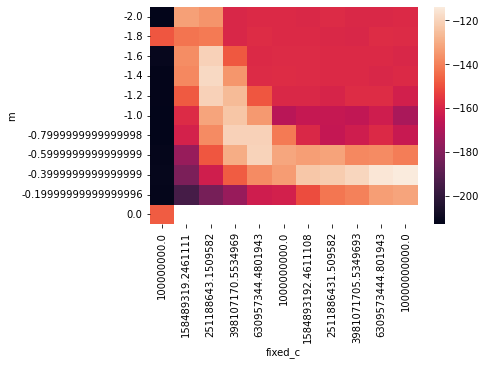

In [20]:
%matplotlib inline

piv = df.loc[df.f == 0.2].groupby(['m','fixed_c']).mean('normalized_logL').reset_index().rename(columns={0:'mean_likelihood'})
piv = piv.pivot("m", "fixed_c", "normalized_logL")
sns.heatmap(piv)
plt.show()

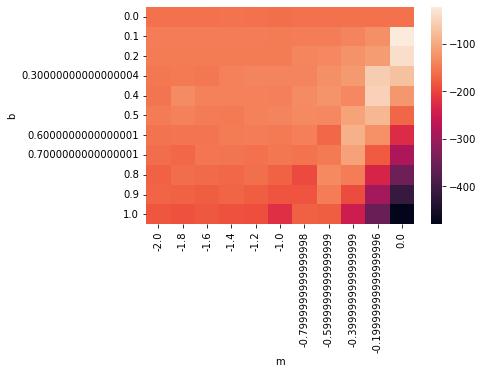

In [21]:
%matplotlib inline

piv = df.loc[df.f == 0.2].groupby(['b','m']).mean('normalized_logL').reset_index().rename(columns={0:'mean_likelihood'})
piv = piv.pivot("b", "m", "normalized_logL")
sns.heatmap(piv)
plt.show()

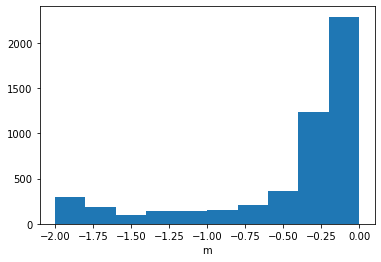

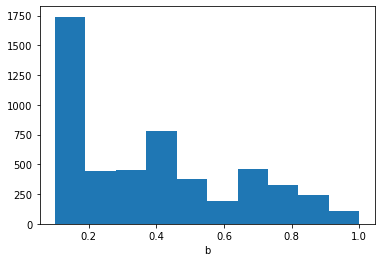

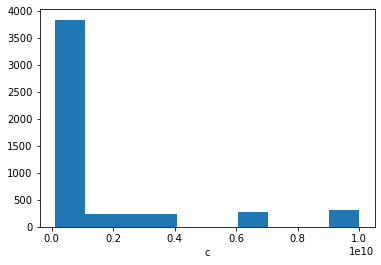

In [22]:
plt.hist(df_keep.m)
plt.xlabel('m')
plt.show()

plt.hist(df_keep.b)
plt.xlabel('b')
plt.show()

plt.hist(df_keep.fixed_c)
plt.xlabel('c')
plt.show()

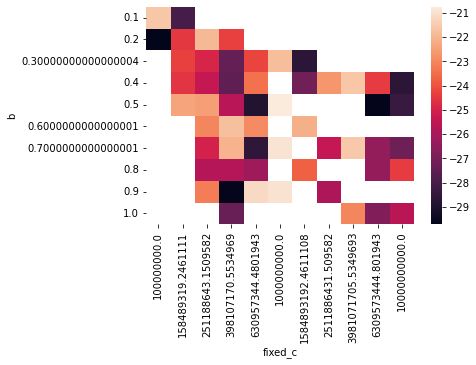

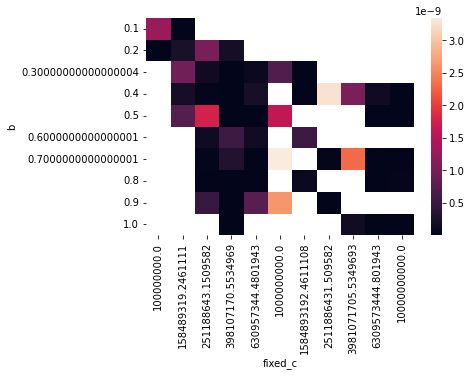

In [23]:
### mean of logL

piv = df_keep.groupby(['b','fixed_c']).mean('normalized_logL').reset_index()
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
#piv['logL_new'] = np.log(piv.likelihood)
piv = piv.pivot("b", "fixed_c", "normalized_logL")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['b','fixed_c']).mean('normalized_likelihood').reset_index().rename(columns={0:'mean_likelihood'})
piv = piv.pivot("b", "fixed_c", "normalized_likelihood")
sns.heatmap(piv)
plt.show()

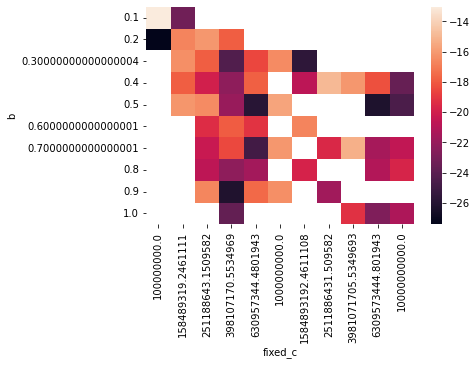

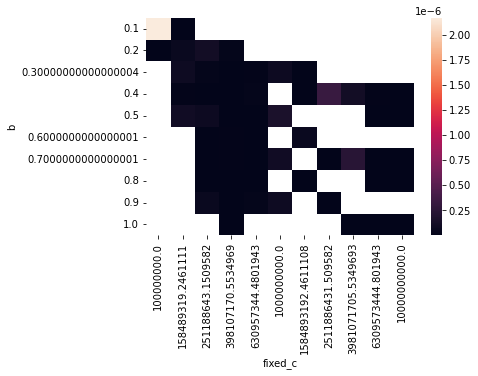

In [24]:
### sum of likelihood, and then re-logged

piv = df_keep.groupby(['b','fixed_c']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
piv['logL_new'] = np.log(piv.normalized_likelihood)
piv = piv.pivot("b", "fixed_c", "logL_new")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['b','fixed_c']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
piv = piv.pivot("b", "fixed_c", "normalized_likelihood")
sns.heatmap(piv)
plt.show()

In [25]:
df_a = df_keep.loc[(np.round(df_keep.b,1) == 0.3) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

In [26]:
df_b = df_keep.loc[(np.round(df_keep.b,1) == 0.4) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

In [27]:
df_c = df_keep.loc[(np.round(df_keep.b,1) == 0.5) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

In [28]:
df_z = df_keep.loc[(np.round(df_keep.b,1) == 1.0) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

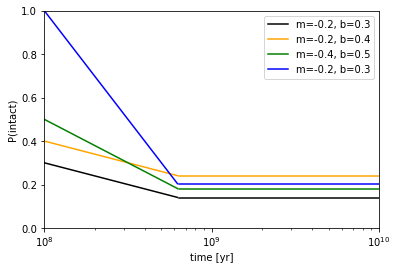

In [29]:
def compute_prob(x, m, b, c):
    return b + m*(np.log10(x)-8)

def compute_prob_after_cutoff(x, m, b, c):
    return b + m*(np.log10(c)-8)
    
%matplotlib inline
x = np.linspace(1e8, 1e10, 1000)
m = -0.2
b = 0.3
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='k', label='m=-0.2, b=0.3')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='k')

m = -0.2
b = 0.4
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='orange', label='m=-0.2, b=0.4')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='orange')

m = -0.4
b = 0.5
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='green', label='m=-0.4, b=0.5')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='green')

m = -1.0
b = 1.0
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='blue', label='m=-0.2, b=0.3')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='blue')

plt.xlim(1e8, 1e10)
plt.ylim(0, 1)
plt.xscale('log')
plt.ylabel('P(intact)')
plt.xlabel('time [yr]')
plt.legend()
plt.show()

#### Zero-bin

Favored models

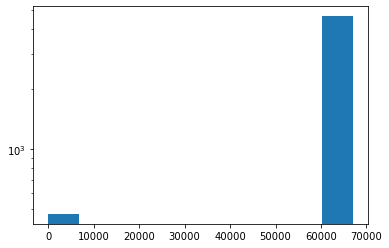

In [49]:
zero_bins = []
transit_multiplicity_zero_bin = []
for j, i in enumerate(df.normalized_transit_multiplicity_zero_bin):
    zero_bins.append(67380-np.sum(i))
    temp = df_keep.reset_index().transit_multiplicity[j]
    temp.insert(0,67380 - np.sum(i))
    transit_multiplicity_zero_bin.append(temp)
    #print(df_keep.reset_index().transit_multiplicity[j])
    #adsfadfdf
    #transit_multiplicity_zero_bin = df_keep.reset_index().transit_multiplicity[j].insert(0,67380 - np.sum(i))
#df_keep['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

plt.hist(zero_bins)
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [50]:
df_keep['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_1768/930433814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin


In [51]:
df_keep['transit_multiplicity_zero_bin']

1220     [66902.3, 397.90000000000003, 54.4000000000000...
1221     [66905.7, 400.70000000000005, 47.1, 12.3, 9.0,...
1222     [66905.2, 397.70000000000005, 50.5, 14.5, 6.80...
1223     [66909.0, 394.40000000000003, 49.7, 12.6000000...
1224     [1.4551915228366852e-11, 66922.7, 377.90000000...
                               ...                        
73277    [62527.0, 4010.0, 555.0, 123.0, 90.0, 56.0, 19.0]
73278     [62756.0, 3801.0, 550.0, 119.0, 95.0, 50.0, 9.0]
73279     [62774.0, 3878.0, 480.0, 124.0, 85.0, 35.0, 4.0]
73280     [62762.0, 3881.0, 498.0, 115.0, 82.0, 33.0, 9.0]
73281    [0.0, 62687.0, 3902.0, 541.0, 134.0, 73.0, 35....
Name: transit_multiplicity_zero_bin, Length: 5120, dtype: object

/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_1768/1353789934.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['normalized_transit_multiplicity_w_zero'] = df_keep.apply(func=normalize, axis=1)


1220     [143552.1404647268, 853.7732886749006, 116.725...
1221     [144588.53573687538, 865.9445498629559, 101.78...
1222     [144435.1937657961, 858.5562342038753, 109.019...
1223     [145608.75796178344, 858.3014861995755, 108.15...
1224     [2.2136706899786325e-13, 1018.0434476105671, 5...
                               ...                        
73277    [13206.30022666392, 846.9503399958788, 117.221...
73278    [13911.09429065744, 842.5659602076124, 121.918...
73279    [13969.463742943986, 862.9939209726443, 106.81...
73280    [13930.500216543958, 861.4172802078822, 110.53...
73281    [0.0, 953.6090086078955, 59.35811813594538, 8....
Name: normalized_transit_multiplicity_w_zero, Length: 5120, dtype: object


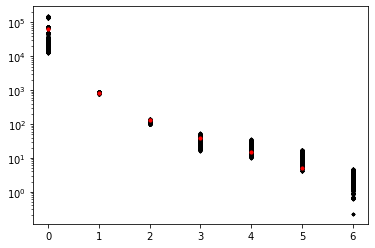

In [57]:
def normalize(curr_row: pd.Series):
    """
    First, remove fraction of planet-hosting systems from each multiplicity. 
    Then, normalize against sample total planet-hosting systems. 
    """
    #print(curr_row)
    first = curr_row['transit_multiplicity']
    #first += [0.] * (6 - len(first)) # pad with zeros to match length of k
    #second = curr_row['f']
    #print(first)
    #print(second)
    
    try:
        # remove previous normalization
        #first = [np.array(fl)/second for fl in first[1:]] # sum only 1+ bins
    
        # normalize against Kepler data s.t. sum of every transit multiplicity is 1025
        return [np.array(fl)*sum(k)/sum(first[1:]) for fl in first]
    
    except Exception as e: # return list of N nans, where N is length of transit multiplicity array    
        print(e)
        try: # eg. divide by zero for f=0; we don't care about those
            return np.nan*np.ones(len(first))
        
        except: # eg. accessed one too many levels
            return np.nan  

df_keep['normalized_transit_multiplicity_w_zero'] = df_keep.apply(func=normalize, axis=1)
print(df_keep['normalized_transit_multiplicity_w_zero'])

for i in range(len(df_keep)):
    try:
        plt.scatter(np.arange(7), df_keep.reset_index().normalized_transit_multiplicity_w_zero[i], s=5, color='k')
    except:
        pass
plt.scatter(np.arange(7), nonzero_k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.show()




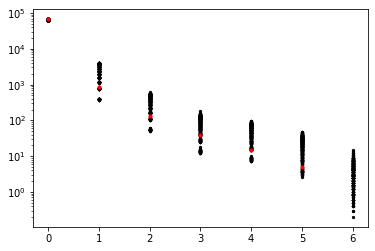

In [25]:
for i in range(len(df_keep)):
    plt.scatter(np.arange(7), df_keep.reset_index().transit_multiplicity_zero_bin[i], s=5, color='k')
plt.scatter(np.arange(7), nonzero_k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.show()

All models

In [35]:
df

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_frac2,...,old45_transit_multiplicity,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL,normalized_likelihood,fixed_c,redundant
0,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
1,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
2,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
3,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
4,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.0,1.000000e+08,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,...,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]",-5298.913593,"[0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,NaN,100000000.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78315,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,1.0,1.000000e+10,0.9,-3811.522896,"[2277.9, 1598.4, 1112.4, 762.3000000000001, 36...",0.9,0.0,1.0,...,"[1252.8, 875.7, 601.2, 420.3, 189.9, 37.800000...",-1478.074096,"[1147.5, 812.7, 570.6, 384.3, 201.6, 50.4]",-1365.080776,"[1130.4, 785.7, 541.8000000000001, 378.0, 166....","[376.52757619738753, 264.2089985486212, 183.87...",-480.541302,2.011704e-209,100000000.0,True
78316,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,1.0,1.000000e+10,0.9,-3805.139345,"[2264.4, 1539.0, 1152.9, 797.4, 366.3, 66.6000...",0.9,0.0,1.0,...,"[1232.1000000000001, 825.3000000000001, 635.4,...",-1468.749064,"[1161.9, 790.2, 573.3000000000001, 405.0, 198....",-1376.593747,"[1102.5, 748.8000000000001, 579.6, 392.4000000...","[375.16729706139074, 254.98254291533314, 191.0...",-486.174721,7.194512e-212,100000000.0,True
78317,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,1.0,1.000000e+10,1.0,-4400.422949,"[2612.0, 1717.0, 1259.0, 816.0, 430.0, 86.0]",1.0,0.0,1.0,...,"[1423.0, 956.0, 693.0, 450.0, 227.0, 42.0]",-1691.015415,"[1337.0, 861.0, 643.0, 407.0, 223.0, 50.0]",-1611.277304,"[1275.0, 856.0, 616.0, 409.0, 207.0, 36.0]","[386.89306358381504, 254.32442196531792, 186.4...",-462.889185,9.327843e-202,100000000.0,True
78318,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,1.0,1.000000e+10,1.0,-4392.528368,"[2531.0, 1776.0, 1236.0, 847.0, 409.0, 91.0]",1.0,0.0,1.0,...,"[1392.0, 973.0, 668.0, 467.0, 211.0, 42.0]",-1721.979568,"[1275.0, 903.0, 634.0, 427.0, 224.0, 56.0]",-1594.186247,"[1256.0, 873.0, 602.0, 420.0, 185.0, 35.0]","[376.52757619738753, 264.2089985486212, 183.87...",-480.541302,2.011704e-209,100000000.0,True


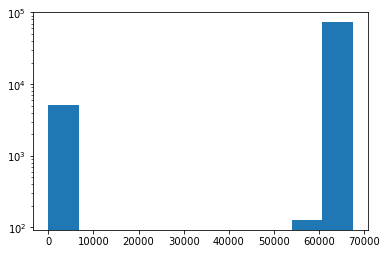

In [36]:
zero_bins = []
transit_multiplicity_zero_bin = []
for j, i in enumerate(df.transit_multiplicity):
    zero_bins.append(67380-np.sum(i))
    temp = df.reset_index().transit_multiplicity[j]
    temp.insert(0,67380 - np.sum(i))
    transit_multiplicity_zero_bin.append(temp)
    #print(df_keep.reset_index().transit_multiplicity[j])
    #adsfadfdf
    #transit_multiplicity_zero_bin = df_keep.reset_index().transit_multiplicity[j].insert(0,67380 - np.sum(i))
#df_keep['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

plt.hist(zero_bins)
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [41]:
df['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

ValueError: Length of values (470) does not match length of index (78320)

In [38]:
df.transit_multiplicity_zero_bin

0                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4                  [67380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                               ...                        
78315    [61179.0, 2277.9, 1598.4, 1112.4, 762.30000000...
78316    [61193.4, 2264.4, 1539.0, 1152.9, 797.4, 366.3...
78317    [60460.0, 2612.0, 1717.0, 1259.0, 816.0, 430.0...
78318    [60490.0, 2531.0, 1776.0, 1236.0, 847.0, 409.0...
78319    [60506.0, 2516.0, 1710.0, 1281.0, 886.0, 407.0...
Name: transit_multiplicity_zero_bin, Length: 78320, dtype: object

In [ ]:
exceptions = 0
for i in range(len(df)):
    try:
        plt.scatter(np.arange(7), df.reset_index().transit_multiplicity_zero_bin[i], s=5, color='k')
    except:
        #print(df.reset_index().transit_multiplicity_zero_bin[i])
        exceptions += 1

print(exceptions)
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2, s=10)
plt.yscale('log')
plt.show()

#### Do the favored normalized models produce reasonable transit multiplicities and intact fractions? 

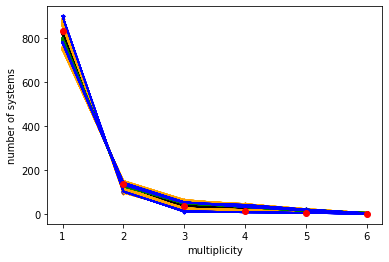

In [58]:
for i in df_a.normalized_transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='k', s=5)
    plt.plot(np.arange(7)[1:], i, color='k')

for i in df_b.normalized_transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='orange', s=5)
    plt.plot(np.arange(7)[1:], i, color='orange')
    
for i in df_c.normalized_transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='green', s=5)
    plt.plot(np.arange(7)[1:], i, color='green')
    
for i in df_z.normalized_transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='blue', s=5)
    plt.plot(np.arange(7)[1:], i, color='blue')
    
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2)
    
plt.ylabel('number of systems')
plt.xlabel('multiplicity')
plt.show()

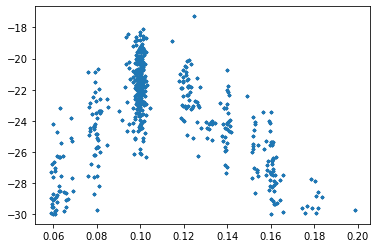

In [ ]:
plt.scatter(df_keep.intact_frac2, df_keep.normalized_logL, s=5)
plt.show()

No.

In [60]:
print(np.median(df_a.normalized_transit_multiplicity.to_list(), axis=0)) # m=-0.2
print(np.median(df_b.normalized_transit_multiplicity.to_list(), axis=0)) # m=-0.2
print(np.median(df_c.normalized_transit_multiplicity.to_list(), axis=0)) # m=-0.4
print(np.median(df_z.normalized_transit_multiplicity.to_list(), axis=0)) # what? oh, it's cause m=-1.0

print(better_loglike(np.median(df_a.normalized_transit_multiplicity.to_list(), axis=0), k))
print(better_loglike(np.median(df_b.normalized_transit_multiplicity.to_list(), axis=0), k))
print(better_loglike(np.median(df_c.normalized_transit_multiplicity.to_list(), axis=0), k))
print(better_loglike(np.median(df_z.normalized_transit_multiplicity.to_list(), axis=0), k))

[821.76976037 124.00062276  37.00841174  25.8739389   12.51112424
   3.09795659]
[860.67029786 113.74907643  25.03023066  17.36566619   8.03430725
   2.20892988]
[790.9934232  129.37119796  49.12096259  33.70498153  15.42104753
   3.22640934]
[781.47678897 132.48997996  50.3256513   31.37543077  16.83052909
   1.66666667]
-23.61041734842737
-22.498826282832255
-31.530187010266495
-30.464266012068126


Looks like the problem of non-smooth color gradients in the heatmap comes largely from the fact that 11x11x11 is just not fine enough of a sample grid. Also, small number statistics...but the variances in logL aren't big enough to explain that away. 

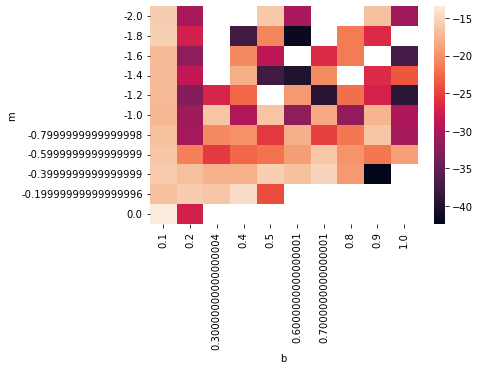

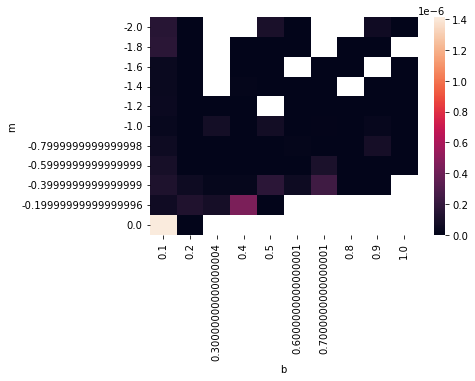

In [61]:
piv = df_keep.groupby(['m','b']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
piv['logL_new'] = np.log(piv.normalized_likelihood)
piv = piv.pivot("m", "b", "logL_new")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['m','b']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
piv = piv.pivot("m", "b", "normalized_likelihood")
sns.heatmap(piv)
plt.show()

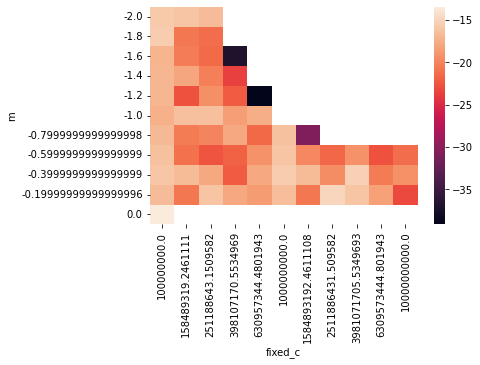

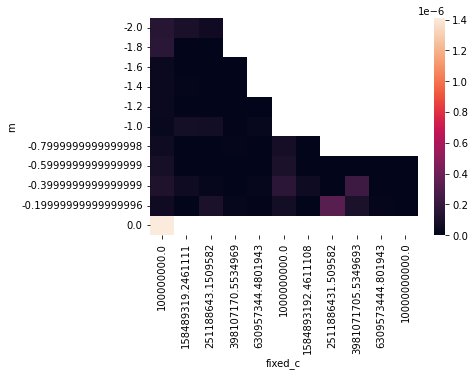

In [62]:
piv = df_keep.groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
piv['logL_new'] = np.log(piv.normalized_likelihood)
piv = piv.pivot("m", "fixed_c", "logL_new")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['m','fixed_c']).sum('normalized_likelihood').reset_index().rename(columns={0:'sum_likelihood'})
piv = piv.pivot("m", "fixed_c", "normalized_likelihood")
sns.heatmap(piv)
plt.show()

### emcee

In [25]:
import emcee

def log_prob():
    return 

In [30]:
ndim, nwalkers = 3, 10
ivar = 1. / np.random.rand(ndim)
print(ivar)
p0 = np.random.randn(nwalkers, ndim)
print(p0)

#sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[ivar])
#sampler.run_mcmc(p0, 10000)

[1.50444437 1.16968888 1.34632016]
[[ 0.13901097 -1.25832079 -0.99180628]
 [-0.40180879  0.65863629 -2.20360307]
 [-0.83511283  0.66110892 -0.09119209]
 [ 0.11055307 -1.89515115  1.47381738]
 [-1.01144396  0.35205247 -0.33664609]
 [ 1.42185461 -0.56092347 -0.06399069]
 [ 0.33149321 -0.36662715 -0.80829745]
 [-1.50606791 -0.77259987 -1.03836678]
 [-0.2821688  -2.22714138 -0.08295806]
 [-0.65497419 -1.67212723 -0.06213843]]


In [ ]:
p0 = np.random.rand(10, 1)
